<a href="https://colab.research.google.com/github/malik214-rgb/StudyCase_DataMinning/blob/main/STUDYCASE_(1)_DATA_MINING_KELOMPOK_1D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
tabel = pd.DataFrame({'NIM': [11220940000001,11220940000018,112209400000033,11220940000053,11210940000073],
                      'Nama': ['Hoirotun Nissa','Shafira Al-zuhra','Arjuananta Malik','Uswatun Hasanah','Tony Pramudya Bagus Santoso']})
tabel.rename(index={0:'1',1:'2',2:'3',3:'4',4:'5'})

,NIM,Nama
1,11220940000001,Hoirotun Nissa
2,11220940000018,Shafira Al-zuhra
3,112209400000033,Arjuananta Malik
4,11220940000053,Uswatun Hasanah
5,11210940000073,Tony Pramudya Bagus Santoso


DatminD

In [ ]:
# Loading Data:
import pandas as pd

try: # Running Locally, yakinkan "file_" berada di folder "data"
    dfJ = pd.read_csv("data/jakarta.csv")
    dfD = pd.read_csv("data/depok.csv")
    dfB = pd.read_csv("data/bogor.csv")
    dfT = pd.read_csv("data/tangerang.csv")
    dfX = pd.read_csv("data/bekasi.csv")
except: # Running in Google Colab
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taudataanalytics/Data-Mining--Penambangan-Data--Ganjil-2024/master/data/jakarta.csv
    !wget -P data/ https://raw.githubusercontent.com/taudataanalytics/Data-Mining--Penambangan-Data--Ganjil-2024/master/data/depok.csv
    !wget -P data/ https://raw.githubusercontent.com/taudataanalytics/Data-Mining--Penambangan-Data--Ganjil-2024/master/data/bogor.csv
    !wget -P data/ https://raw.githubusercontent.com/taudataanalytics/Data-Mining--Penambangan-Data--Ganjil-2024/master/data/tangerang.csv
    !wget -P data/ https://raw.githubusercontent.com/taudataanalytics/Data-Mining--Penambangan-Data--Ganjil-2024/master/data/bekasi.csv
    dfJ = pd.read_csv("data/jakarta.csv")
    dfD = pd.read_csv("data/depok.csv")
    dfB = pd.read_csv("data/bogor.csv")
    dfT = pd.read_csv("data/tangerang.csv")
    dfX = pd.read_csv("data/bekasi.csv")

In [ ]:
import warnings; warnings.simplefilter('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.cm as cm
from collections import Counter
import plotly.express as px
plt.style.use('bmh'); sns.set()

**Jakarta**

In [ ]:
# Melihat beberapa baris pertama dari masing-masing DataFrame
dfJ = pd.read_csv("data/jakarta.csv")
dfJ

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,06-12-2021,202.0,198.0,8.0,3.0,NaN,NaN,Jakarta Pusat,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,02-12-2021,30.0,55.0,2.0,1.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,06-12-2021,19.0,35.0,2.0,1.0,NaN,NaN,Jakarta Pusat,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,06-12-2021,33.0,42.0,2.0,2.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,06-12-2021,30.0,55.0,2.0,2.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Melihat nama kolom
print(dfJ.columns)

Index(['created_at', 'LT', 'LB', 'KT', 'KM', 'garasi', 'carport', 'lokasi',
       'sertifikat', 'listrik', 'hadap', 'harga', 'URL', 'deskripsi',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25'],
      dtype='object')


In [ ]:
#mengahpus nama kolom/variabel yang tidak diperlukan
dfJ1 = dfJ.drop(columns=['Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25'])
dfJ1.head()

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
0,06-12-2021,202.0,198.0,8.0,3.0,NaN,NaN,Jakarta Pusat,SHM,2200.0,NaN,4.500000e+09,https://www.rumah.com/listing-properti/dijual-...,Dekat Cikini Salemba Taman Isamail Marzuki Kam...
1,02-12-2021,30.0,55.0,2.0,1.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,NaN,1.100000e+09,https://www.rumah.com/listing-properti/dijual-...,"Mengusung konsep minimalis, dan didukung denga..."
2,06-12-2021,19.0,35.0,2.0,1.0,NaN,NaN,Jakarta Pusat,SHM,2200.0,NaN,3.950000e+08,https://www.rumah.com/listing-properti/dijual-...,"Dekat dengan Mall Atrium Senen, dekat dengan a..."
3,06-12-2021,33.0,42.0,2.0,2.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,NaN,8.350000e+08,https://www.rumah.com/listing-properti/dijual-...,"Berlokasi sangat strategis, sangat dekat ke Tu..."
4,06-12-2021,30.0,55.0,2.0,2.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,NaN,1.100000e+09,https://www.rumah.com/listing-properti/dijual-...,"Bisa request ubah tata ruang, beli 2 unit mend..."


In [ ]:
dfJ1.shape

(1024, 14)

In [ ]:
#melihat info/tipe data variabel
dfJ1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1024 entries, 0 to 1023
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   created_at  121 non-null    object 
 1   LT          121 non-null    float64
 2   LB          121 non-null    float64
 3   KT          121 non-null    float64
 4   KM          121 non-null    float64
 5   garasi      44 non-null     float64
 6   carport     90 non-null     float64
 7   lokasi      121 non-null    object 
 8   sertifikat  119 non-null    object 
 9   listrik     120 non-null    float64
 10  hadap       36 non-null     object 
 11  harga       121 non-null    float64
 12  URL         121 non-null    object 
 13  deskripsi   112 non-null    object 
dtypes: float64(8), object(6)
memory usage: 112.1+ KB


In [ ]:
print(dfJ1['lokasi'].unique())

['Jakarta Pusat' 'Jakarta Selatan' 'Jakarta Barat' 'Jakarta Utara '
 'Jakarta Timur' nan]


In [ ]:
print(dfJ1['sertifikat'].unique())

['SHM' 'SHGB' 'SHM + IMB' 'SHM + IMB + PBB' 'SHM + Hak Pakai' 'PPJB' nan
 'AJB']


In [ ]:
#Menampilkan persentase Missing value dari data vaksin masing2 variabel
(dfJ1.isnull().sum()/len(dfJ1)).to_frame('persentase missing')

,persentase missing
created_at,0.881836
LT,0.881836
LB,0.881836
KT,0.881836
KM,0.881836
garasi,0.957031
carport,0.912109
lokasi,0.881836
sertifikat,0.883789
listrik,0.882812


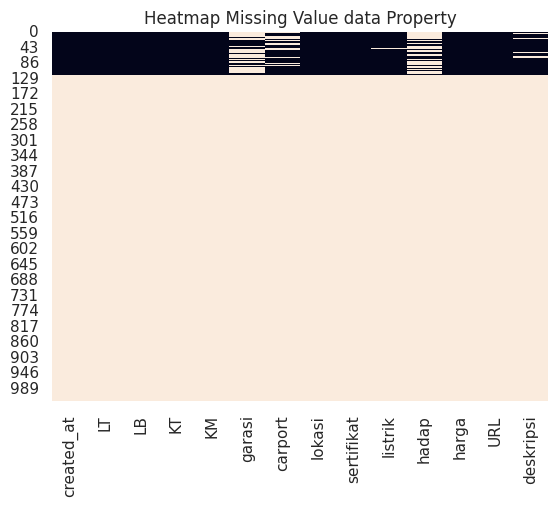

In [ ]:
#visualisasi missing value yang lebih baik terutama untuk big data
sns.heatmap(dfJ1.isnull(), cbar=False)
plt.title('Heatmap Missing Value data Property')
plt.show()

In [ ]:
# Menghapus baris jika ada missing values di lebih dari 8 kolom
dfJ1_cln = dfJ1.dropna(how='all')
dfJ1_cln.shape

(121, 14)

In [ ]:
dfJ1_cln.isnull().sum()

,0
created_at,0
LT,0
LB,0
KT,0
KM,0
garasi,77
carport,31
lokasi,0
sertifikat,2
listrik,1


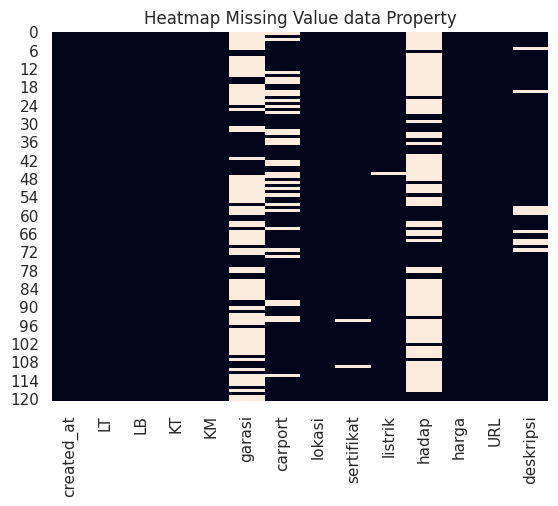

In [ ]:
#visualisasi missing value yang lebih baik terutama untuk big data
sns.heatmap(dfJ1_cln.isnull(), cbar=False)
plt.title('Heatmap Missing Value data Property')
plt.show()

In [ ]:
dfJ1_cln

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
0,06-12-2021,202.0,198.0,8.0,3.0,NaN,NaN,Jakarta Pusat,SHM,2200.0,NaN,4.500000e+09,https://www.rumah.com/listing-properti/dijual-...,Dekat Cikini Salemba Taman Isamail Marzuki Kam...
1,02-12-2021,30.0,55.0,2.0,1.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,NaN,1.100000e+09,https://www.rumah.com/listing-properti/dijual-...,"Mengusung konsep minimalis, dan didukung denga..."
2,06-12-2021,19.0,35.0,2.0,1.0,NaN,NaN,Jakarta Pusat,SHM,2200.0,NaN,3.950000e+08,https://www.rumah.com/listing-properti/dijual-...,"Dekat dengan Mall Atrium Senen, dekat dengan a..."
3,06-12-2021,33.0,42.0,2.0,2.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,NaN,8.350000e+08,https://www.rumah.com/listing-properti/dijual-...,"Berlokasi sangat strategis, sangat dekat ke Tu..."
4,06-12-2021,30.0,55.0,2.0,2.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,NaN,1.100000e+09,https://www.rumah.com/listing-properti/dijual-...,"Bisa request ubah tata ruang, beli 2 unit mend..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,22-11-2021,220.0,239.0,5.0,4.0,1.0,2.0,Jakarta Timur,PPJB,3500.0,NaN,3.850000e+09,https://www.rumah.com/listing-properti/dijual-...,Rumah Mewah siap huni 2 lantai 220m 10x22 type...
117,06-12-2021,70.0,57.0,3.0,2.0,NaN,2.0,Jakarta Timur,SHM,2200.0,NaN,8.800000e+08,https://www.rumah.com/listing-properti/dijual-...,Rumah Signature Location & Access :\n• 2 Menit...
118,06-12-2021,315.0,280.0,4.0,3.0,1.0,2.0,Jakarta Timur,SHM + IMB,3500.0,Timur,4.300000e+09,https://www.rumah.com/listing-properti/dijual-...,"Rumah 1, 5 Lantai Luas Strategis di Pondok Bam..."
119,06-12-2021,135.0,190.0,5.0,5.0,NaN,2.0,Jakarta Timur,SHM + IMB,2200.0,Selatan,3.400000e+09,https://www.rumah.com/listing-properti/dijual-...,Rumah Baru Non Komplek Posisi Hook Lokasi Stra...


In [ ]:
dfJ1_cln.fillna(0, inplace = True)

In [ ]:
dfJ1_cln.isnull().sum()

,0
created_at,0
LT,0
LB,0
KT,0
KM,0
garasi,0
carport,0
lokasi,0
sertifikat,0
listrik,0


In [ ]:
# Mengubah tipe data object menjadi category
dfJ1_cln[['lokasi']] = dfJ1_cln[['lokasi']].astype('category')
dfJ1_cln[['sertifikat']] = dfJ1_cln[['sertifikat']].astype('category')
dfJ1_cln['created_at'] = pd.to_datetime(dfJ1_cln['created_at'], format='mixed', errors='coerce')
dfJ1.dtypes

,0
created_at,object
LT,float64
LB,float64
KT,float64
KM,float64
garasi,float64
carport,float64
lokasi,object
sertifikat,object
listrik,float64


In [ ]:
dfJ1_cln

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
0,2021-06-12,202.0,198.0,8.0,3.0,0.0,0.0,Jakarta Pusat,SHM,2200.0,0,4.500000e+09,https://www.rumah.com/listing-properti/dijual-...,Dekat Cikini Salemba Taman Isamail Marzuki Kam...
1,2021-02-12,30.0,55.0,2.0,1.0,0.0,1.0,Jakarta Pusat,SHM,2200.0,0,1.100000e+09,https://www.rumah.com/listing-properti/dijual-...,"Mengusung konsep minimalis, dan didukung denga..."
2,2021-06-12,19.0,35.0,2.0,1.0,0.0,0.0,Jakarta Pusat,SHM,2200.0,0,3.950000e+08,https://www.rumah.com/listing-properti/dijual-...,"Dekat dengan Mall Atrium Senen, dekat dengan a..."
3,2021-06-12,33.0,42.0,2.0,2.0,0.0,1.0,Jakarta Pusat,SHM,2200.0,0,8.350000e+08,https://www.rumah.com/listing-properti/dijual-...,"Berlokasi sangat strategis, sangat dekat ke Tu..."
4,2021-06-12,30.0,55.0,2.0,2.0,0.0,1.0,Jakarta Pusat,SHM,2200.0,0,1.100000e+09,https://www.rumah.com/listing-properti/dijual-...,"Bisa request ubah tata ruang, beli 2 unit mend..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,2021-11-22,220.0,239.0,5.0,4.0,1.0,2.0,Jakarta Timur,PPJB,3500.0,0,3.850000e+09,https://www.rumah.com/listing-properti/dijual-...,Rumah Mewah siap huni 2 lantai 220m 10x22 type...
117,2021-06-12,70.0,57.0,3.0,2.0,0.0,2.0,Jakarta Timur,SHM,2200.0,0,8.800000e+08,https://www.rumah.com/listing-properti/dijual-...,Rumah Signature Location & Access :\n• 2 Menit...
118,2021-06-12,315.0,280.0,4.0,3.0,1.0,2.0,Jakarta Timur,SHM + IMB,3500.0,Timur,4.300000e+09,https://www.rumah.com/listing-properti/dijual-...,"Rumah 1, 5 Lantai Luas Strategis di Pondok Bam..."
119,2021-06-12,135.0,190.0,5.0,5.0,0.0,2.0,Jakarta Timur,SHM + IMB,2200.0,Selatan,3.400000e+09,https://www.rumah.com/listing-properti/dijual-...,Rumah Baru Non Komplek Posisi Hook Lokasi Stra...


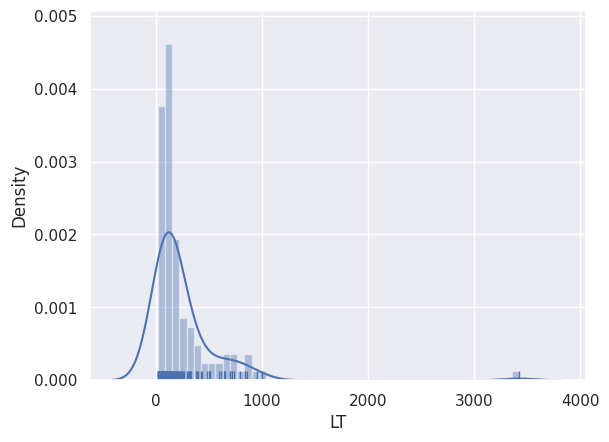

In [ ]:
# Cek Outlier pada LT
import seaborn as sns
p = sns.distplot(dfJ1_cln['LT'], kde=True, rug=True)

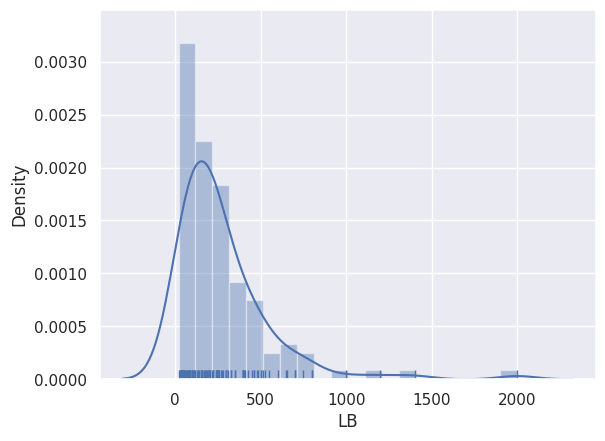

In [ ]:
# Cek Outlier pada LB
p = sns.distplot(dfJ1_cln['LB'], kde=True, rug=True)

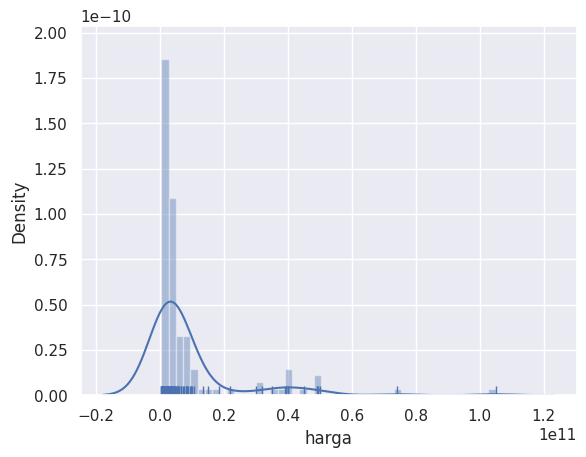

In [ ]:
# Cek Outlier pada Harga
p = sns.distplot(dfJ1_cln['harga'], kde=True, rug=True)

**Depok**

In [ ]:
#Melihat beberapa baris pertama dari masing-masing DataFrame
print("depok:")
dfD

depok:


,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,6-12-2021,165,200.0,4.0,2.0,NaN,1.0,Sukmajaya,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6-12-2021,50,45.0,2.0,1.0,NaN,NaN,Cipayung,SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6-12-2021,50,36.0,2.0,1.0,NaN,1.0,Sawangan,SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6-12-2021,50,45.0,2.0,1.0,NaN,NaN,Cimanggis,SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6-12-2021,72,45.0,2.0,1.0,NaN,1.0,Sawangan,SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
## menghapus unnamed
dfD1 = dfD.dropna(axis=1, how='all')
dfD1

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
0,6-12-2021,165,200.0,4.0,2.0,NaN,1.0,Sukmajaya,SHM,2200.0,Selatan,2100.0,https://www.rumah123.com/properti/depok/hos928...,Rumah siap huni komplek Pelni
1,6-12-2021,50,45.0,2.0,1.0,NaN,NaN,Cipayung,SHM,1300.0,NaN,250.0,https://www.rumah123.com/properti/depok/hos928...,rumah minimalis termurah di citayam
2,6-12-2021,50,36.0,2.0,1.0,NaN,1.0,Sawangan,SHM,1300.0,Barat,250.0,https://www.rumah123.com/properti/depok/hos928...,CLUSTER TERMURAH DI SAWANGAN KOTA DEPOK
3,6-12-2021,50,45.0,2.0,1.0,NaN,NaN,Cimanggis,SHM,1300.0,NaN,250.0,https://www.rumah123.com/properti/depok/hos928...,RUMAH SIAP HUNI HARGA NEGO DEKAT STASIUN CITAYAM
4,6-12-2021,72,45.0,2.0,1.0,NaN,1.0,Sawangan,SHM,1300.0,Timur,350.0,https://www.rumah123.com/properti/depok/hos928...,Rumah Cluster Siap Huni Depok
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dfD1.describe(include='all')

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
count,119,120,118.000000,118.000000,118.000000,25.000000,94.000000,118,118,103.000000,62,118.000000,118,118
unique,4,58,NaN,NaN,NaN,NaN,NaN,11,2,NaN,6,NaN,118,102
top,5-12-2021,50,NaN,NaN,NaN,NaN,NaN,Sawangan,SHM,NaN,Utara,NaN,https://www.rumah123.com/properti/depok/hos928...,Rumah Cluster Siap Huni Depok
freq,74,12,NaN,NaN,NaN,NaN,NaN,30,116,NaN,19,NaN,1,4
mean,NaN,NaN,92.618644,2.737288,1.940678,1.760000,1.670213,NaN,NaN,2147.572816,NaN,1194.440678,NaN,NaN
std,NaN,NaN,92.630404,1.024720,0.980950,1.392839,1.061428,NaN,NaN,1166.261386,NaN,1474.387409,NaN,NaN
min,NaN,NaN,15.000000,2.000000,1.000000,1.000000,1.000000,NaN,NaN,900.000000,NaN,41.000000,NaN,NaN
25%,NaN,NaN,46.000000,2.000000,1.000000,1.000000,1.000000,NaN,NaN,1300.000000,NaN,485.000000,NaN,NaN
50%,NaN,NaN,61.000000,3.000000,2.000000,1.000000,1.000000,NaN,NaN,2200.000000,NaN,810.000000,NaN,NaN
75%,NaN,NaN,102.250000,3.000000,2.000000,2.000000,2.000000,NaN,NaN,2200.000000,NaN,1137.500000,NaN,NaN


In [ ]:
dfD1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   created_at  119 non-null    object 
 1   LT          120 non-null    object 
 2   LB          118 non-null    float64
 3   KT          118 non-null    float64
 4   KM          118 non-null    float64
 5   garasi      25 non-null     float64
 6   carport     94 non-null     float64
 7   lokasi      118 non-null    object 
 8   sertifikat  118 non-null    object 
 9   listrik     103 non-null    float64
 10  hadap       62 non-null     object 
 11  harga       118 non-null    float64
 12  URL         118 non-null    object 
 13  deskripsi   118 non-null    object 
dtypes: float64(7), object(7)
memory usage: 109.3+ KB


In [ ]:
#total duplikat data
dfD1.duplicated().sum()

877

In [ ]:
# Menghapus baris yang memiliki data duplikat
dfD1.drop_duplicates(inplace = True)

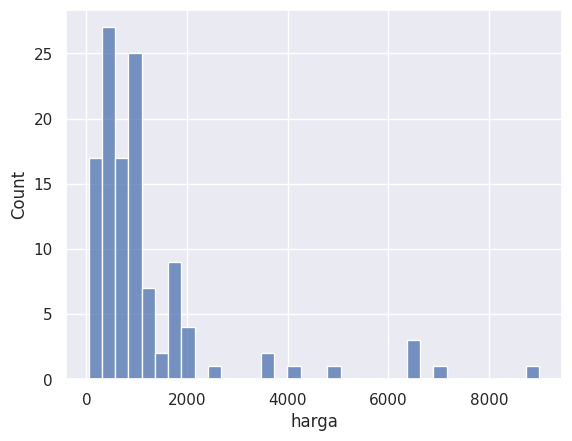

In [ ]:
# mengecek outlier dengan menggunakan histogram
histo1 = sns.histplot(dfD1['harga'])

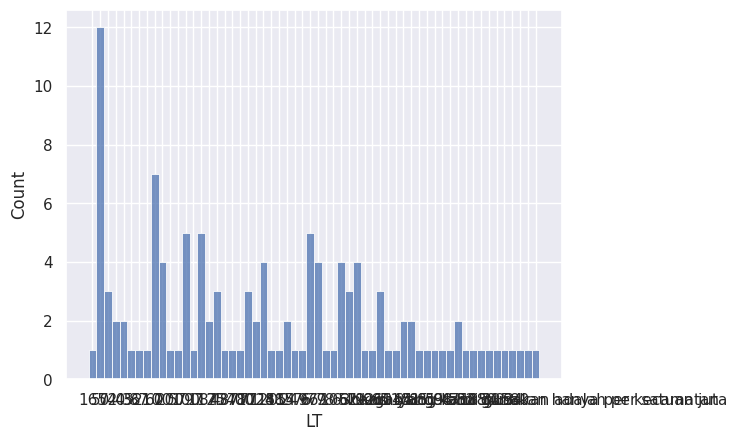

In [ ]:
#mengecek outlier dengan menggunakan histogram
histo3 = sns.histplot(dfD1['LT'])

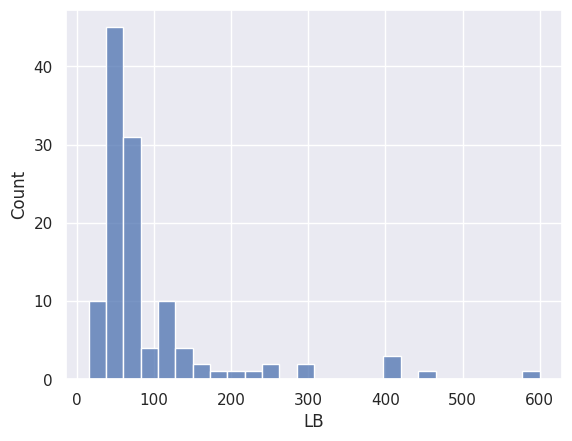

In [ ]:
#mengecek outlier dengan menggunakan histogram
histo4 = sns.histplot(dfD1['LB'])

In [ ]:
# Mengecek noise dengan melihat distribusi dari variabel kategorik
dfD1['lokasi'].value_counts()

,count
lokasi,
Sawangan,30
Cimanggis,25
Cinere,12
Tapos,12
Sukmajaya,9
Cipayung,9
Pancoran Mas,9
Beji,5
Cilodong,3


In [ ]:
# Mengecek noise dengan melihat distribusi dari variabel kategorik
dfD1['sertifikat'].value_counts()

,count
sertifikat,
SHM,116
Lainnya,2


In [ ]:
# Mengecek noise dengan melihat distribusi dari variabel kategorik
dfD1['hadap'].value_counts()

,count
hadap,
Utara,19
Barat,15
Timur,15
Selatan,11
Barat Daya,1
Timur Laut,1


In [ ]:
# Untuk mengetahui jumlah missing value di setiap variabel
print(dfD1.isnull().sum()) #Lebih efisien memakai ini

created_at     2
LT             1
LB             3
KT             3
KM             3
garasi        96
carport       27
lokasi         3
sertifikat     3
listrik       18
hadap         59
harga          3
URL            3
deskripsi      3
dtype: int64


In [ ]:
(dfD1.isnull().sum()/len(dfD1)).to_frame('persentase missing')

,persentase missing
created_at,0.016529
LT,0.008264
LB,0.024793
KT,0.024793
KM,0.024793
garasi,0.793388
carport,0.223140
lokasi,0.024793
sertifikat,0.024793
listrik,0.148760


In [ ]:
# Menghapus baris yang memiliki data duplikat
dfD1.drop_duplicates(inplace = True)

In [ ]:
dfD1.shape

(121, 14)

In [ ]:
dfD1.fillna(0, inplace = True)

In [ ]:
dfD1.isnull().sum()

,0
created_at,0
LT,0
LB,0
KT,0
KM,0
garasi,0
carport,0
lokasi,0
sertifikat,0
listrik,0


In [ ]:
# Mengubah tipe data created_at menjadi datetime
import pandas as pd
dfD1['created_at'] = pd.to_datetime(dfD1['created_at'], format='mixed', errors='coerce') # Changed format to 'mixed' and added errors='coerce' to handle invalid values

In [ ]:
# Mengubah tipe data object menjadi category
dfD1[['lokasi']] = dfD1[['lokasi']].astype('category')
dfD1[['sertifikat']] = dfD1[['sertifikat']].astype('category')
dfD1.dtypes

,0
created_at,datetime64[ns]
LT,object
LB,float64
KT,float64
KM,float64
garasi,float64
carport,float64
lokasi,category
sertifikat,category
listrik,float64


In [ ]:
#Menghapus baris jika ada missing values di lebih dari 14 kolom
dfD2= dfD1.dropna(how='all')
dfD2.shape

(121, 14)

In [ ]:
dfD2.isnull().sum()

,0
created_at,1
LT,0
LB,0
KT,0
KM,0
garasi,0
carport,0
lokasi,0
sertifikat,0
listrik,0


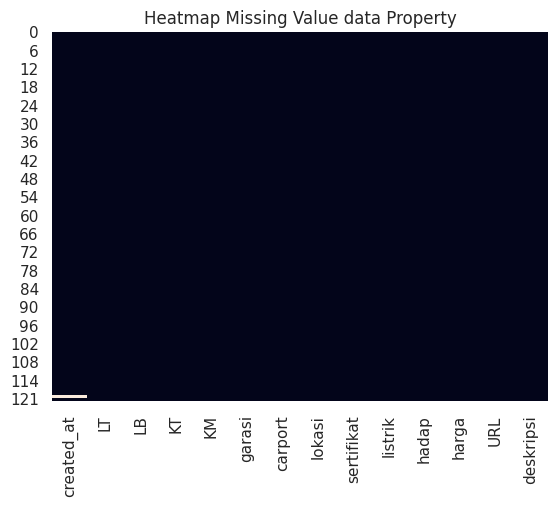

In [ ]:
#visualisasi missing value yang lebih baik terutama untuk big data
sns.heatmap(dfD2.isnull(), cbar=False)
plt.title('Heatmap Missing Value data Property')
plt.show()

In [ ]:
# Menghapus missing value
dfD2.fillna(0, inplace = True)

In [ ]:
dfD2.drop(index= 118, inplace=True)
dfD2.drop(index= 120, inplace=True)
dfD2.drop(index= 121, inplace=True)


In [ ]:
dfD2.isnull().sum()

,0
created_at,0
LT,0
LB,0
KT,0
KM,0
garasi,0
carport,0
lokasi,0
sertifikat,0
listrik,0


In [ ]:
dfD2.shape

(118, 14)

**Bogor**

In [ ]:
#Melihat beberapa baris pertama dari masing-masing DataFrame
print("Bogor:")
dfB

Bogor:


,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,03-12-2021,75.0,38.0,2.0,1.0,1.0,1.0,Bojonggede,SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,06-12-2021,60.0,40.0,1.0,1.0,0.0,1.0,Babakan Madang,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,06-12-2021,60.0,50.0,2.0,2.0,0.0,1.0,Babakan Madang,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,06-12-2021,60.0,70.0,3.0,2.0,0.0,1.0,Babakan Madang,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,06-12-2021,90.0,60.0,3.0,2.0,0.0,2.0,Babakan Madang,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Melihat beberapa baris pertama dari masing-masing DataFrame
print("Bogor:")
dfB

Bogor:


,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,03-12-2021,75.0,38.0,2.0,1.0,1.0,1.0,Bojonggede,SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,06-12-2021,60.0,40.0,1.0,1.0,0.0,1.0,Babakan Madang,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,06-12-2021,60.0,50.0,2.0,2.0,0.0,1.0,Babakan Madang,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,06-12-2021,60.0,70.0,3.0,2.0,0.0,1.0,Babakan Madang,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,06-12-2021,90.0,60.0,3.0,2.0,0.0,2.0,Babakan Madang,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
## menghapus unnamed
dfB1 = dfB.dropna(axis=1, how='all')
dfB1

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
0,03-12-2021,75.0,38.0,2.0,1.0,1.0,1.0,Bojonggede,SHM,1300.0,Barat,6.925500e+08,https://rumahdijual.com/bekasi/10799791-rumah-...,"Dekat tol jati warna, dekat sutle busway, deka..."
1,06-12-2021,60.0,40.0,1.0,1.0,0.0,1.0,Babakan Madang,SHM,2200.0,NaN,8.114000e+08,https://www.rumah123.com/perumahan-baru/proper...,Destinasi menarik di kawasan Babakan Madang; G...
2,06-12-2021,60.0,50.0,2.0,2.0,0.0,1.0,Babakan Madang,SHM,2200.0,NaN,9.005000e+08,https://www.rumah123.com/perumahan-baru/proper...,Destinasi menarik di kawasan Babakan Madang; G...
3,06-12-2021,60.0,70.0,3.0,2.0,0.0,1.0,Babakan Madang,SHM,2200.0,NaN,1.001900e+09,https://www.rumah123.com/perumahan-baru/proper...,Destinasi menarik di kawasan Babakan Madang; G...
4,06-12-2021,90.0,60.0,3.0,2.0,0.0,2.0,Babakan Madang,SHM,2200.0,NaN,1.200800e+09,https://www.rumah123.com/perumahan-baru/proper...,Destinasi menarik di kawasan Babakan Madang; G...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dfB1.describe(include='all')

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
count,193,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193,193,193.000000,19,1.930000e+02,193,193
unique,7,NaN,NaN,NaN,NaN,NaN,NaN,27,3,NaN,7,NaN,186,171
top,06-12-2021,NaN,NaN,NaN,NaN,NaN,NaN,Gunung Putri,SHM,NaN,Selatan,NaN,https://www.rumah123.com/perumahan-baru/proper...,Destinasi menarik di kawasan Babakan Madang; G...
freq,52,NaN,NaN,NaN,NaN,NaN,NaN,26,155,NaN,5,NaN,6,6
mean,NaN,143.575130,98.663212,2.694301,1.797927,0.155440,1.310881,NaN,NaN,2076.165803,NaN,1.289362e+09,NaN,NaN
std,NaN,191.576208,125.851746,1.110939,1.175087,0.485931,0.905271,NaN,NaN,1562.633932,NaN,2.115854e+09,NaN,NaN
min,NaN,30.000000,21.000000,1.000000,1.000000,0.000000,0.000000,NaN,NaN,900.000000,NaN,6.500000e+07,NaN,NaN
25%,NaN,66.000000,36.000000,2.000000,1.000000,0.000000,1.000000,NaN,NaN,1300.000000,NaN,3.990000e+08,NaN,NaN
50%,NaN,84.000000,58.000000,2.000000,1.000000,0.000000,1.000000,NaN,NaN,1300.000000,NaN,6.700000e+08,NaN,NaN
75%,NaN,120.000000,90.000000,3.000000,2.000000,0.000000,1.000000,NaN,NaN,2200.000000,NaN,1.250000e+09,NaN,NaN


In [ ]:
dfB1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   created_at  193 non-null    object 
 1   LT          193 non-null    float64
 2   LB          193 non-null    float64
 3   KT          193 non-null    float64
 4   KM          193 non-null    float64
 5   garasi      193 non-null    float64
 6   carport     193 non-null    float64
 7   lokasi      193 non-null    object 
 8   sertifikat  193 non-null    object 
 9   listrik     193 non-null    float64
 10  hadap       19 non-null     object 
 11  harga       193 non-null    float64
 12  URL         193 non-null    object 
 13  deskripsi   193 non-null    object 
dtypes: float64(8), object(6)
memory usage: 109.4+ KB


In [ ]:
# Mengubah tipe data created_at menjadi datetime
import pandas as pd
dfB1['created_at']=pd.to_datetime(dfB1['created_at'])

In [ ]:
#total duplikat data
dfB1.duplicated().sum()

805

In [ ]:
# Menghapus baris yang memiliki data duplikat
dfB1.drop_duplicates(inplace = True)

In [ ]:
# Total duplikat data
dfB1.duplicated().sum()

0

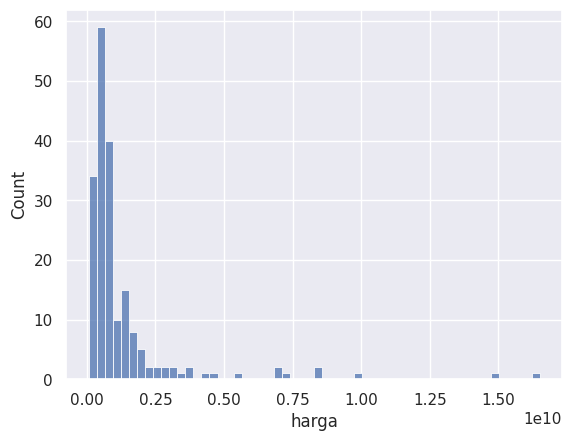

In [ ]:
# mengecek outlier dengan menggunakan histogram
histo1 = sns.histplot(dfB1['harga'])

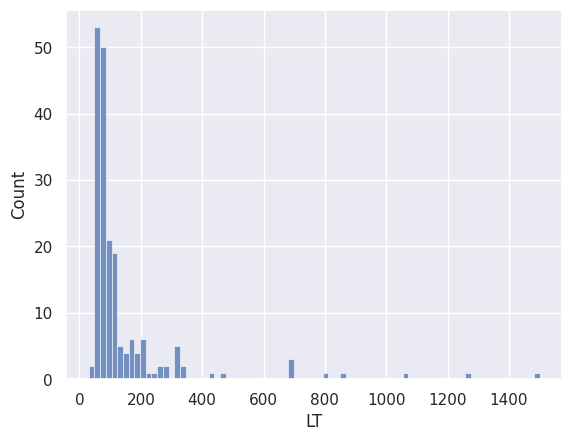

In [ ]:
#mengecek outlier dengan Menggunakan histogram
histo3 = sns.histplot(dfB1['LT'])

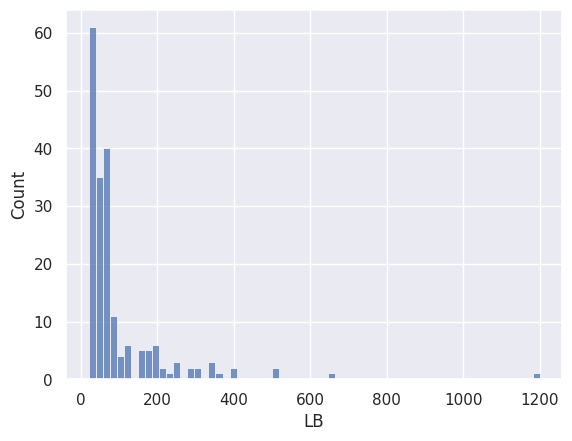

In [ ]:
#mengecek outlier dengan menggunakan histogram
histo4 = sns.histplot(dfB1['LB'])

In [ ]:
dfB1.shape

(194, 14)

In [ ]:
# Mengecek noise dengan melihat distribusi dari variabel kategorik
dfB1['lokasi'].value_counts()

,count
lokasi,
Gunung Putri,26
Babakan Madang,25
Parung,20
Bogor Barat,16
Bojonggede,12
Cibinong,12
Bogor Utara,11
Cileungsi,11
Jonggol,7


In [ ]:
# Mengecek noise dengan melihat distribusi dari variabel kategorik
dfB1['sertifikat'].value_counts()

,count
sertifikat,
SHM,155
SHGB,33
Lainnya,5


In [ ]:
# Mengecek noise dengan melihat distribusi dari variabel kategorik
dfB1['hadap'].value_counts()

,count
hadap,
Selatan,5
Timur,5
Barat,3
Utara,3
"Timur, Utara",1
"Selatan, Utara",1
Danau,1


In [ ]:
# Untuk mengetahui jumlah missing value di setiap variabel
print(dfB1.isnull().sum()) #Lebih efisien memakai ini

created_at      1
LT              1
LB              1
KT              1
KM              1
garasi          1
carport         1
lokasi          1
sertifikat      1
listrik         1
hadap         175
harga           1
URL             1
deskripsi       1
dtype: int64


In [ ]:
(dfB1.isnull().sum()/len(dfB1)).to_frame('persentase missing')

,persentase missing
created_at,0.005155
LT,0.005155
LB,0.005155
KT,0.005155
KM,0.005155
garasi,0.005155
carport,0.005155
lokasi,0.005155
sertifikat,0.005155
listrik,0.005155


In [ ]:
#Menghapus baris jika ada missing values di lebih dari 14 kolom
dfB2= dfB1.dropna(how='all')
dfB2.shape

(193, 14)

In [ ]:
dfB2.isnull().sum()

,0
created_at,0
LT,0
LB,0
KT,0
KM,0
garasi,0
carport,0
lokasi,0
sertifikat,0
listrik,0


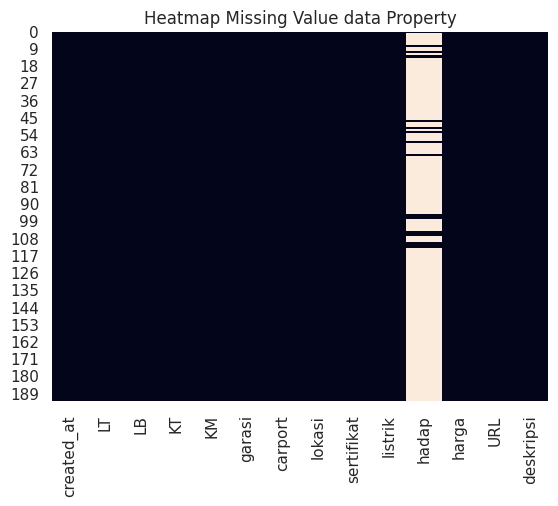

In [ ]:
#visualisasi missing value yang lebih baik terutama untuk big data
sns.heatmap(dfB2.isnull(), cbar=False)
plt.title('Heatmap Missing Value data Property')
plt.show()

In [ ]:
# Menghapus missing value
dfB2.fillna(0, inplace = True)

In [ ]:
dfB2.shape

(193, 14)

In [ ]:
# Mengubah tipe data object menjadi category
dfB1[['lokasi']] = dfB1[['lokasi']].astype('category')
dfB1[['sertifikat']] = dfB1[['sertifikat']].astype('category')
dfB1['created_at'] = pd.to_datetime(dfB1['created_at'], format='mixed', errors='coerce')
dfB1.dtypes

,0
created_at,datetime64[ns]
LT,float64
LB,float64
KT,float64
KM,float64
garasi,float64
carport,float64
lokasi,category
sertifikat,category
listrik,float64


**Tangerang**

In [ ]:
# perintah untuk melihat kolom yang berada di data dfT
dfT.columns

Index(['created_at', 'LT', 'LB', 'KT', 'KM', 'garasi', 'carport', 'lokasi',
       'sertifikat', 'listrik', 'hadap', 'harga', 'URL', 'deskripsi',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25'],
      dtype='object')

In [ ]:
# Perintah untuk menghapus beberapa kolom yang tidak berguna dikarenakan hanya berisi NaN
dfT.drop(
    ["Unnamed: 14", "Unnamed: 15", "Unnamed: 16", "Unnamed: 17",
     "Unnamed: 18", "Unnamed: 19", "Unnamed: 20", "Unnamed: 21",
     "Unnamed: 22", "Unnamed: 23", "Unnamed: 24", "Unnamed: 25"],
    axis=1,
    inplace=True
)
# Menampilkan DataFrame setelah penghapusan kolom
dfT

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
0,12-06-2021,60.0,50.0,3.0,2.0,NaN,NaN,"BSD CITY, TANGERANG",SHM,1300.0,Selatan,500.0,https://www.rumah123.com/properti/tangerang/ho...,"Rumah 2 Lantai Akses Strategis, Keamanan 24jam..."
1,12-06-2021,72.0,54.0,2.0,1.0,1.0,1.0,"CISAUK, TANGERANG",SHM,1300.0,NaN,480.0,https://www.rumah123.com/properti/tangerang/ho...,"lokasi strategis dekat gading serpong, dekat a..."
2,12-06-2021,60.0,48.0,3.0,2.0,2.0,2.0,"CILEDUG, TANGERANG",SHM,2200.0,NaN,600.0,https://www.rumah123.com/properti/tangerang/ho...,"Boston Village Bintaro, Cluster dengan konsep ..."
3,12-06-2021,200.0,225.0,5.0,4.0,NaN,NaN,"LIPPO KARAWACI, TANGERANG",SHM,5500.0,NaN,4250.0,https://www.rumah123.com/properti/tangerang/ho...,"DIJUAL RUMAH BARU SELESAI DIBANGUN, LIPPO KARA..."
4,12-06-2021,76.0,123.0,3.0,3.0,NaN,2.0,"PONDOK CABE, TANGERANG",SHM,2200.0,NaN,1700.0,https://www.rumah123.com/properti/tangerang/ho...,"diapit oleh 3 tol besar, JOR 2, Cinere-Jagoraw..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,12-08-2021,91.0,91.0,3.0,2.0,NaN,NaN,"Poris, Tangerang",SHM,3500.0,NaN,1000.0,https://www.rumah123.com/properti/tangerang/ho...,Akses Mudah: 10 Menit Ke stasiun kereta poris ...
124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dfT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   created_at  124 non-null    object 
 1   LT          124 non-null    float64
 2   LB          124 non-null    float64
 3   KT          124 non-null    float64
 4   KM          124 non-null    float64
 5   garasi      38 non-null     float64
 6   carport     92 non-null     float64
 7   lokasi      124 non-null    object 
 8   sertifikat  122 non-null    object 
 9   listrik     111 non-null    float64
 10  hadap       49 non-null     object 
 11  harga       124 non-null    float64
 12  URL         124 non-null    object 
 13  deskripsi   124 non-null    object 
dtypes: float64(8), object(6)
memory usage: 14.1+ KB


In [ ]:
# Mengubah tipe data created_at menjadi datetime
dfT['created_at']=pd.to_datetime(dfT['created_at'])

In [ ]:
#mengecek apakah ada duplikat data?
print(dfT.shape)
dfT.duplicated().sum()

(128, 14)


3

In [ ]:
#menghapus entri yang memiliki data duplikat
dfT.drop_duplicates(inplace=True)
print(dfT.duplicated().sum()) # no more duplicates
print(dfT.shape) # re-check by printing data size

0
(125, 14)


In [ ]:
# Melihat secara general missing value
print(dfT.isnull().sum())

created_at     1
LT             1
LB             1
KT             1
KM             1
garasi        87
carport       33
lokasi         1
sertifikat     3
listrik       14
hadap         76
harga          1
URL            1
deskripsi      1
dtype: int64


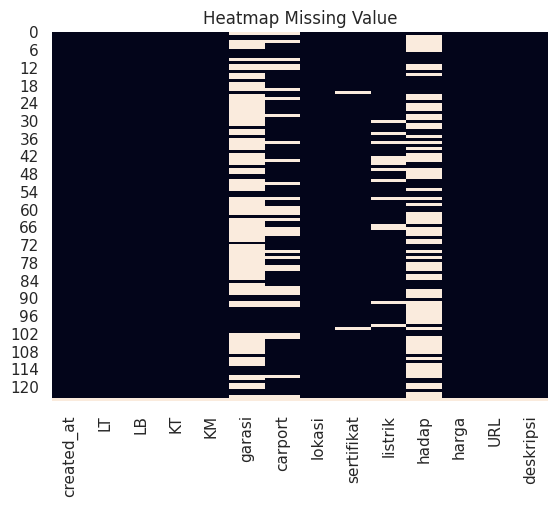

In [ ]:
sns.heatmap(dfT.isnull(), cbar=False)
plt.title('Heatmap Missing Value')
plt.show()

In [ ]:
(dfT.isnull().sum()/len(dfT)).to_frame('persentase missing')

,persentase missing
created_at,0.008
LT,0.008
LB,0.008
KT,0.008
KM,0.008
garasi,0.696
carport,0.264
lokasi,0.008
sertifikat,0.024
listrik,0.112


In [ ]:
# Menghitung persentase missing value di setiap kolom
missing_percentage = (dfT.isnull().sum() / dfT.shape[0]) * 100

# Menampilkan hasil dalam bentuk persentase dengan tanda %
print(missing_percentage.apply(lambda x: '{:.2f}%'.format(x)))

created_at     0.80%
LT             0.80%
LB             0.80%
KT             0.80%
KM             0.80%
garasi        69.60%
carport       26.40%
lokasi         0.80%
sertifikat     2.40%
listrik       11.20%
hadap         60.80%
harga          0.80%
URL            0.80%
deskripsi      0.80%
dtype: object


In [ ]:
print(dfT.isnull().sum())
dfT.head()

created_at     1
LT             1
LB             1
KT             1
KM             1
garasi        87
carport       33
lokasi         1
sertifikat     3
listrik       14
hadap         76
harga          1
URL            1
deskripsi      1
dtype: int64


,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
0,2021-12-06,60.0,50.0,3.0,2.0,NaN,NaN,"BSD CITY, TANGERANG",SHM,1300.0,Selatan,500.0,https://www.rumah123.com/properti/tangerang/ho...,"Rumah 2 Lantai Akses Strategis, Keamanan 24jam..."
1,2021-12-06,72.0,54.0,2.0,1.0,1.0,1.0,"CISAUK, TANGERANG",SHM,1300.0,NaN,480.0,https://www.rumah123.com/properti/tangerang/ho...,"lokasi strategis dekat gading serpong, dekat a..."
2,2021-12-06,60.0,48.0,3.0,2.0,2.0,2.0,"CILEDUG, TANGERANG",SHM,2200.0,NaN,600.0,https://www.rumah123.com/properti/tangerang/ho...,"Boston Village Bintaro, Cluster dengan konsep ..."
3,2021-12-06,200.0,225.0,5.0,4.0,NaN,NaN,"LIPPO KARAWACI, TANGERANG",SHM,5500.0,NaN,4250.0,https://www.rumah123.com/properti/tangerang/ho...,"DIJUAL RUMAH BARU SELESAI DIBANGUN, LIPPO KARA..."
4,2021-12-06,76.0,123.0,3.0,3.0,NaN,2.0,"PONDOK CABE, TANGERANG",SHM,2200.0,NaN,1700.0,https://www.rumah123.com/properti/tangerang/ho...,"diapit oleh 3 tol besar, JOR 2, Cinere-Jagoraw..."


In [ ]:
dfT.fillna(0, inplace = True)

In [ ]:
dfT.isnull().sum()

,0
created_at,0
LT,0
LB,0
KT,0
KM,0
garasi,0
carport,0
lokasi,0
sertifikat,0
listrik,0


In [ ]:
# Melihat keseluruhan data setelah imputasi
dfT

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
0,2021-12-06 00:00:00,60.0,50.0,3.0,2.0,0.0,0.0,"BSD CITY, TANGERANG",SHM,1300.0,Selatan,500.0,https://www.rumah123.com/properti/tangerang/ho...,"Rumah 2 Lantai Akses Strategis, Keamanan 24jam..."
1,2021-12-06 00:00:00,72.0,54.0,2.0,1.0,1.0,1.0,"CISAUK, TANGERANG",SHM,1300.0,0,480.0,https://www.rumah123.com/properti/tangerang/ho...,"lokasi strategis dekat gading serpong, dekat a..."
2,2021-12-06 00:00:00,60.0,48.0,3.0,2.0,2.0,2.0,"CILEDUG, TANGERANG",SHM,2200.0,0,600.0,https://www.rumah123.com/properti/tangerang/ho...,"Boston Village Bintaro, Cluster dengan konsep ..."
3,2021-12-06 00:00:00,200.0,225.0,5.0,4.0,0.0,0.0,"LIPPO KARAWACI, TANGERANG",SHM,5500.0,0,4250.0,https://www.rumah123.com/properti/tangerang/ho...,"DIJUAL RUMAH BARU SELESAI DIBANGUN, LIPPO KARA..."
4,2021-12-06 00:00:00,76.0,123.0,3.0,3.0,0.0,2.0,"PONDOK CABE, TANGERANG",SHM,2200.0,0,1700.0,https://www.rumah123.com/properti/tangerang/ho...,"diapit oleh 3 tol besar, JOR 2, Cinere-Jagoraw..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,2021-12-08 00:00:00,66.0,70.0,3.0,2.0,0.0,1.0,"Ciater, Tangerang",SHM,1300.0,0,850.0,https://www.rumah123.com/properti/tangerang/ho...,"Berlian Ciater, Hunian 2 Lantai Nyaman dan Asr..."
121,2021-12-08 00:00:00,202.0,85.0,4.0,3.0,1.0,1.0,"BSD Griya Loka, Tangerang",SHM,2200.0,Barat,1860.0,https://www.rumah123.com/properti/tangerang/ho...,"1-7 km ke Stasiun Rawa Buntu, Rs Eka Hospital,..."
122,2021-12-08 00:00:00,108.0,130.0,3.0,3.0,1.0,1.0,"Pagedangan, Tangerang",SHM,2200.0,0,1800.0,https://www.rumah123.com/properti/tangerang/ho...,"Fasilitas Terdekat :Lokasi strategis, berada d..."
123,2021-12-08 00:00:00,91.0,91.0,3.0,2.0,0.0,0.0,"Poris, Tangerang",SHM,3500.0,0,1000.0,https://www.rumah123.com/properti/tangerang/ho...,Akses Mudah: 10 Menit Ke stasiun kereta poris ...


In [ ]:

dfT.drop(index= 124, inplace=True)

In [ ]:
dfT.shape

(124, 14)

In [ ]:
# Mengubah tipe data object menjadi category
dfT[['lokasi']] = dfT[['lokasi']].astype('category')
dfT[['sertifikat']] = dfT[['sertifikat']].astype('category')
dfT.dtypes

,0
created_at,object
LT,float64
LB,float64
KT,float64
KM,float64
garasi,float64
carport,float64
lokasi,category
sertifikat,category
listrik,float64


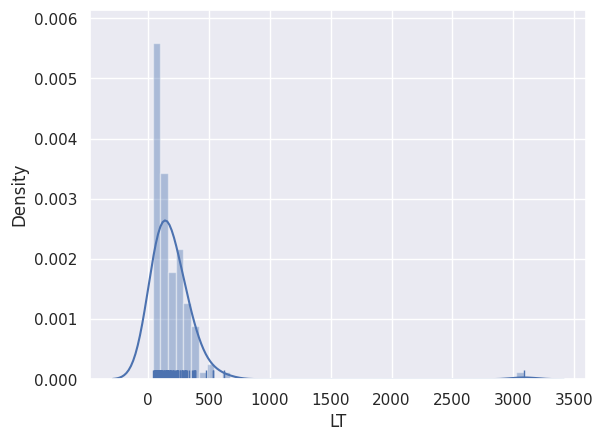

In [ ]:
# Mengecek Outlier pada LT
p = sns.distplot(dfT['LT'], kde=True, rug=True)

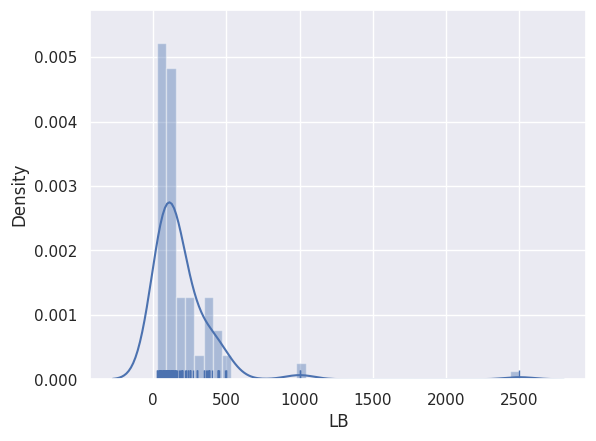

In [ ]:
# Mengecek Outlier pada LB
p = sns.distplot(dfT['LB'], kde=True, rug=True)

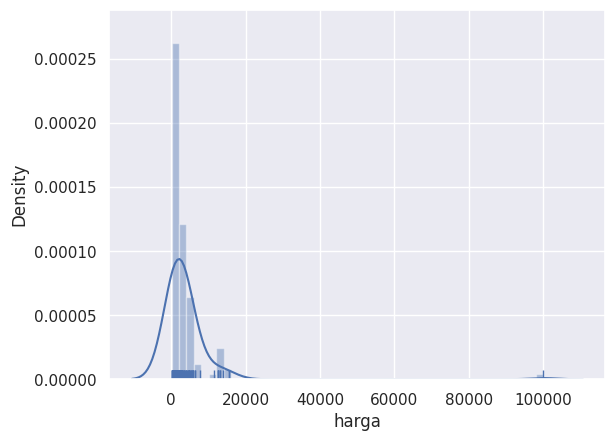

In [ ]:
# Mengecek Outlier pada Harga
p = sns.distplot(dfT['harga'], kde=True, rug=True)

In [ ]:
# Mengubah tipe data object menjadi category
dfT[['lokasi']] = dfT[['lokasi']].astype('category')
dfT[['sertifikat']] = dfT[['sertifikat']].astype('category')
dfT['created_at'] = pd.to_datetime(dfT['created_at'], format='mixed', errors='coerce')
dfT.dtypes

,0
created_at,datetime64[ns]
LT,float64
LB,float64
KT,float64
KM,float64
garasi,float64
carport,float64
lokasi,category
sertifikat,category
listrik,float64


**Bekasi**

In [ ]:
#Melihat beberapa baris pertama dari masing-masing DataFrame
print("Bekasi:")
dfX

Bekasi:


,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,08-12-2021,71.0,43.0,2.0,1.0,NaN,1.0,Kabupaten Bekasi,SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,08-12-2021,59.0,60.0,2.0,1.0,NaN,1.0,Kabupaten Bekasi,SHM,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,08-12-2021,124.0,95.0,2.0,1.0,NaN,1.0,Kabupaten Bekasi,SHM,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,08-12-2021,144.0,100.0,2.0,1.0,NaN,1.0,Kabupaten Bekasi,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,08-12-2021,108.0,100.0,3.0,2.0,NaN,1.0,Kabupaten Bekasi,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
987,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
## menghapus unnamed
dfX1 = dfX.dropna(axis=1, how='all')
dfX1

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
0,08-12-2021,71.0,43.0,2.0,1.0,NaN,1.0,Kabupaten Bekasi,SHM,1300.0,NaN,5.500000e+08,Rumah murah di metland cibitung bekasi - Dijua...,"Selangkah ke stasiun krl telaga murni, Dekat d..."
1,08-12-2021,59.0,60.0,2.0,1.0,NaN,1.0,Kabupaten Bekasi,SHM,NaN,NaN,4.400000e+08,Rumah dijual di Griya gandasari cibitung - Dij...,"Rumah sangat nyaman,dan terbukti bebas banjir,..."
2,08-12-2021,124.0,95.0,2.0,1.0,NaN,1.0,Kabupaten Bekasi,SHM,NaN,NaN,6.990000e+08,Jual cepat rumah huuk di metland cibitung beka...,"Bebas banjir, Carport dan tanah luas ada taman..."
3,08-12-2021,144.0,100.0,2.0,1.0,NaN,1.0,Kabupaten Bekasi,SHM,2200.0,Selatan,1.350000e+09,https://www.realoka.com/216243-rumah-rapi-siap...,(Harapan Indah) Cluster Aralia Kota Harapan In...
4,08-12-2021,108.0,100.0,3.0,2.0,NaN,1.0,Kabupaten Bekasi,SHM,2200.0,Timur,1.400000e+09,https://www.realoka.com/207964-jual-rumah-bagu...,(Harapan Indah) Cluster Harmoni Perumahan Kota...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
987,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dfX1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 992 entries, 0 to 991
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   created_at  107 non-null    object 
 1   LT          107 non-null    float64
 2   LB          107 non-null    float64
 3   KT          107 non-null    float64
 4   KM          106 non-null    float64
 5   garasi      33 non-null     float64
 6   carport     81 non-null     float64
 7   lokasi      107 non-null    object 
 8   sertifikat  106 non-null    object 
 9   listrik     101 non-null    float64
 10  hadap       48 non-null     object 
 11  harga       107 non-null    float64
 12  URL         107 non-null    object 
 13  deskripsi   107 non-null    object 
dtypes: float64(8), object(6)
memory usage: 108.6+ KB


In [ ]:
# Mengubah tipe data created_at menjadi datetime
import pandas as pd
dfX1['created_at']=pd.to_datetime(dfX1['created_at'])

In [ ]:
#total duplikat data
dfX1.duplicated().sum()

884

In [ ]:
# Menghapus baris yang memiliki data duplikat
dfX1.drop_duplicates(inplace = True)

In [ ]:
# Total duplikat data
dfX1.duplicated().sum()

0

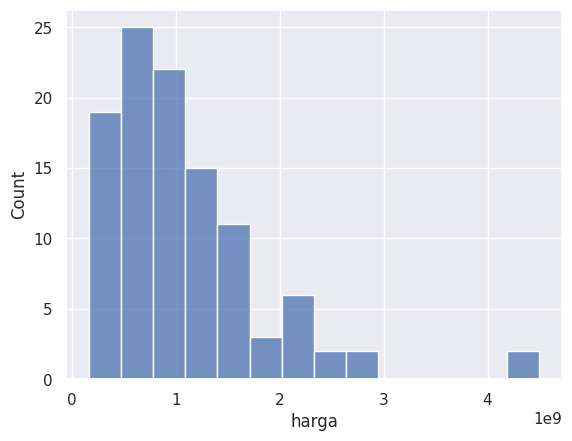

In [ ]:
# mengecek outlier dengan menggunakan histogram
histo1 = sns.histplot(dfX1['harga'])

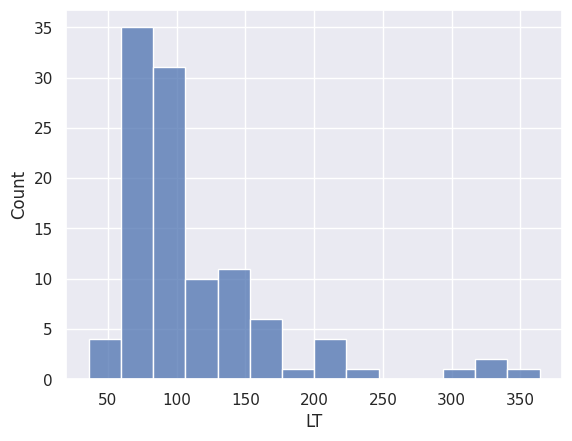

In [ ]:
#mengecek outlier dengan menggunakan histogram
histo3 = sns.histplot(dfX1['LT'])

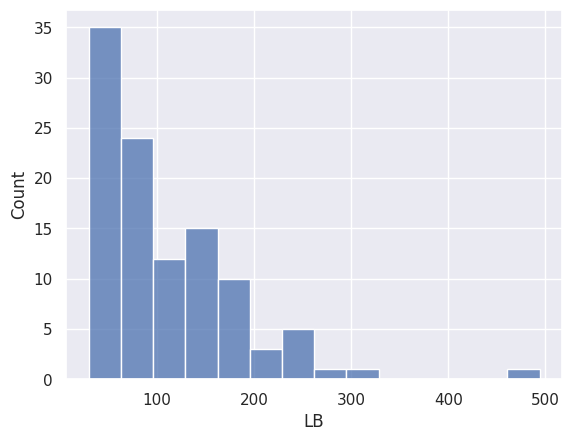

In [ ]:
#mengecek outlier dengan menggunakan histogram
histo4 = sns.histplot(dfX1['LB'])

In [ ]:
# Mengecek noise dengan melihat distribusi dari variabel kategorik
dfX1['lokasi'].value_counts()

,count
lokasi,
Kota Bekasi,73
Kabupaten Bekasi,34


In [ ]:
# Mengecek noise dengan melihat distribusi dari variabel kategorik
dfX1['sertifikat'].value_counts()

,count
sertifikat,
SHM,95
HGB,9
"SHM,IMB",2


In [ ]:
# Mengecek noise dengan melihat distribusi dari variabel kategorik
dfX1['hadap'].value_counts()

,count
hadap,
Selatan,23
Timur,16
Utara,5
Barat,4


In [ ]:
# Untuk mengetahui jumlah missing value di setiap variabel
print(dfX1.isnull().sum()) #Lebih efisien memakai ini

created_at     1
LT             1
LB             1
KT             1
KM             2
garasi        75
carport       27
lokasi         1
sertifikat     2
listrik        7
hadap         60
harga          1
URL            1
deskripsi      1
dtype: int64


In [ ]:
(dfX1.isnull().sum()/len(dfX1)).to_frame('persentase missing')

,persentase missing
created_at,0.009259
LT,0.009259
LB,0.009259
KT,0.009259
KM,0.018519
garasi,0.694444
carport,0.250000
lokasi,0.009259
sertifikat,0.018519
listrik,0.064815


In [ ]:
#Menghapus baris jika ada missing values di lebih dari 14 kolom
dfX2= dfX1.dropna(how='all')
dfX2.shape

(107, 14)

In [ ]:
dfX2.isnull().sum()

,0
created_at,0
LT,0
LB,0
KT,0
KM,1
garasi,74
carport,26
lokasi,0
sertifikat,1
listrik,6


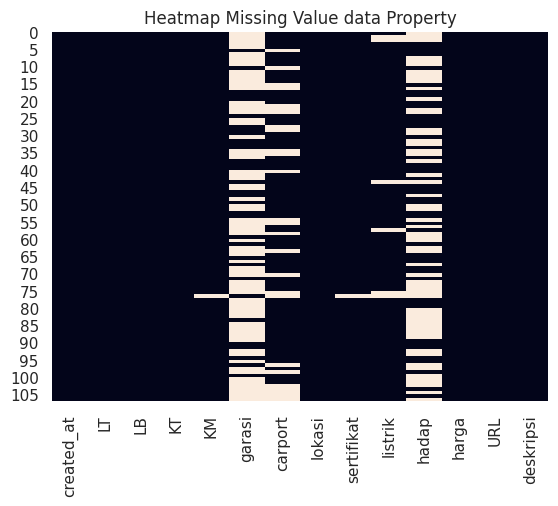

In [ ]:
#visualisasi missing value yang lebih baik terutama untuk big data
sns.heatmap(dfX2.isnull(), cbar=False)
plt.title('Heatmap Missing Value data Property')
plt.show()

In [ ]:
# Menghapus missing value
dfX2.fillna(0, inplace = True)

In [ ]:
dfX2.isnull().sum()

,0
created_at,0
LT,0
LB,0
KT,0
KM,0
garasi,0
carport,0
lokasi,0
sertifikat,0
listrik,0


In [ ]:
# Mengubah tipe data object menjadi category
dfX1[['lokasi']] = dfX1[['lokasi']].astype('category')
dfX1[['sertifikat']] = dfX1[['sertifikat']].astype('category')
dfX1['created_at'] = pd.to_datetime(dfX1['created_at'], format='mixed', errors='coerce')
dfX1.dtypes

,0
created_at,datetime64[ns]
LT,float64
LB,float64
KT,float64
KM,float64
garasi,float64
carport,float64
lokasi,category
sertifikat,category
listrik,float64


**Statistik Deskriptif**

In [ ]:
dfJ1_cln['harga'] = dfJ1_cln['harga'].astype('int')
dfD2['harga'] = dfD2['harga'].astype('int')
dfB2['harga'] = dfB2['harga'].astype('int')
dfT['harga'] = dfT['harga'].astype('int')
dfX2['harga'] = dfX2['harga'].astype('int')

In [ ]:
dfT['harga'] = dfT['harga'] * 1000000
dfD2['harga'] = dfD2['harga'] * 1000000

#Jakarta

In [ ]:
dfJ1_cln.describe(include="all")

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
count,121,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121,121,121.000000,121.0,1.210000e+02,121,121.0
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,8,NaN,11.0,NaN,120,113.0
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jakarta Barat,SHM,NaN,0.0,NaN,https://www.rumah.com/listing-properti/dijual-...,0.0
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25,90,NaN,85.0,NaN,2,9.0
mean,2021-06-30 02:22:48.595041280,247.586777,279.495868,4.272727,3.380165,0.677686,1.454545,NaN,NaN,5380.165289,NaN,8.985955e+09,NaN,NaN
min,2021-01-12 00:00:00,16.000000,21.000000,1.000000,1.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,3.800000e+08,NaN,NaN
25%,2021-06-10 00:00:00,84.000000,97.000000,3.000000,2.000000,0.000000,0.000000,NaN,NaN,2200.000000,NaN,1.600000e+09,NaN,NaN
50%,2021-06-12 00:00:00,135.000000,200.000000,4.000000,3.000000,0.000000,1.000000,NaN,NaN,3500.000000,NaN,3.400000e+09,NaN,NaN
75%,2021-07-12 00:00:00,250.000000,350.000000,5.000000,4.000000,1.000000,2.000000,NaN,NaN,4400.000000,NaN,7.250000e+09,NaN,NaN
max,2021-12-26 00:00:00,3422.000000,2000.000000,10.000000,10.000000,8.000000,10.000000,NaN,NaN,66000.000000,NaN,1.050000e+11,NaN,NaN


#Depok

In [ ]:
dfD2.describe(include="all")

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
count,118,118,118.000000,118.000000,118.000000,118.000000,118.000000,118,118,118.000000,118.0,1.180000e+02,118,118
unique,3,56,NaN,NaN,NaN,NaN,NaN,11,2,NaN,7.0,NaN,118,102
top,2021-05-12 00:00:00,50,NaN,NaN,NaN,NaN,NaN,Sawangan,SHM,NaN,0.0,NaN,https://www.rumah123.com/properti/depok/hos928...,Rumah Cluster Siap Huni Depok
freq,74,12,NaN,NaN,NaN,NaN,NaN,30,116,NaN,56.0,NaN,1,4
mean,NaN,NaN,92.618644,2.737288,1.940678,0.372881,1.330508,NaN,NaN,1874.576271,NaN,1.194441e+09,NaN,NaN
std,NaN,NaN,92.630404,1.024720,0.980950,0.958958,1.162484,NaN,NaN,1304.573575,NaN,1.474387e+09,NaN,NaN
min,NaN,NaN,15.000000,2.000000,1.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,4.100000e+07,NaN,NaN
25%,NaN,NaN,46.000000,2.000000,1.000000,0.000000,1.000000,NaN,NaN,1300.000000,NaN,4.850000e+08,NaN,NaN
50%,NaN,NaN,61.000000,3.000000,2.000000,0.000000,1.000000,NaN,NaN,2200.000000,NaN,8.100000e+08,NaN,NaN
75%,NaN,NaN,102.250000,3.000000,2.000000,0.000000,2.000000,NaN,NaN,2200.000000,NaN,1.137500e+09,NaN,NaN


#Bogor

In [ ]:
dfB2.describe(include='all')

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
count,193,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193,193,193.000000,193.0,1.930000e+02,193,193
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27,3,NaN,8.0,NaN,186,171
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Gunung Putri,SHM,NaN,0.0,NaN,https://www.rumah123.com/perumahan-baru/proper...,Destinasi menarik di kawasan Babakan Madang; G...
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26,155,NaN,174.0,NaN,6,6
mean,2021-05-01 14:10:34.196891136,143.575130,98.663212,2.694301,1.797927,0.155440,1.310881,NaN,NaN,2076.165803,NaN,1.289362e+09,NaN,NaN
min,2021-01-12 00:00:00,30.000000,21.000000,1.000000,1.000000,0.000000,0.000000,NaN,NaN,900.000000,NaN,6.500000e+07,NaN,NaN
25%,2021-03-12 00:00:00,66.000000,36.000000,2.000000,1.000000,0.000000,1.000000,NaN,NaN,1300.000000,NaN,3.990000e+08,NaN,NaN
50%,2021-05-12 00:00:00,84.000000,58.000000,2.000000,1.000000,0.000000,1.000000,NaN,NaN,1300.000000,NaN,6.700000e+08,NaN,NaN
75%,2021-06-12 00:00:00,120.000000,90.000000,3.000000,2.000000,0.000000,1.000000,NaN,NaN,2200.000000,NaN,1.250000e+09,NaN,NaN
max,2021-07-12 00:00:00,1500.000000,1200.000000,8.000000,6.000000,3.000000,8.000000,NaN,NaN,17600.000000,NaN,1.650000e+10,NaN,NaN


#Tangerang

In [ ]:
dfT.describe(include='all').transpose()

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
created_at,124,NaN,NaN,NaN,2021-12-06 06:34:50.322580736,2021-12-06 00:00:00,2021-12-06 00:00:00,2021-12-06 00:00:00,2021-12-06 00:00:00,2021-12-08 00:00:00,NaN
LT,124.0,NaN,NaN,NaN,202.653226,37.0,90.0,150.5,250.0,3087.0,285.219301
LB,124.0,NaN,NaN,NaN,199.491935,27.0,81.5,125.0,240.0,2500.0,264.097681
KT,124.0,NaN,NaN,NaN,3.346774,2.0,3.0,3.0,4.0,8.0,1.097257
KM,124.0,NaN,NaN,NaN,2.693548,1.0,2.0,2.0,3.0,8.0,1.295253
garasi,124.0,NaN,NaN,NaN,0.677419,0.0,0.0,0.0,1.0,10.0,1.445759
carport,124.0,NaN,NaN,NaN,1.193548,0.0,0.0,1.0,2.0,10.0,1.266693
lokasi,124,41,"BSD, TANGERANG",27,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sertifikat,124,4,SHM,96,NaN,NaN,NaN,NaN,NaN,NaN,NaN
listrik,124.0,NaN,NaN,NaN,3546.774194,0.0,2200.0,2200.0,3500.0,66000.0,6505.825226


#Bekasi

In [ ]:
dfX2.describe(include='all')

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
count,107,107.000000,107.000000,107.000000,107.000000,107.000000,107.00000,107,107,107.000000,107.0,1.070000e+02,107,107
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,4,NaN,5.0,NaN,104,106
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Kota Bekasi,SHM,NaN,0.0,NaN,https://www.rumah123.com/properti/bekasi/hos92...,Dijual cepat Rumah cantik rapih siap huni di b...
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73,95,NaN,59.0,NaN,2,2
mean,2021-04-24 23:33:05.046728960,108.822430,110.635514,2.962617,1.925234,0.336449,0.82243,NaN,NaN,1941.121495,NaN,1.074823e+09,NaN,NaN
min,2021-01-12 00:00:00,36.000000,30.000000,1.000000,0.000000,0.000000,0.00000,NaN,NaN,0.000000,NaN,1.600000e+08,NaN,NaN
25%,2021-03-12 00:00:00,72.000000,60.000000,2.000000,1.000000,0.000000,1.00000,NaN,NaN,1300.000000,NaN,5.805000e+08,NaN,NaN
50%,2021-05-12 00:00:00,91.000000,90.000000,3.000000,2.000000,0.000000,1.00000,NaN,NaN,2200.000000,NaN,9.200000e+08,NaN,NaN
75%,2021-06-12 00:00:00,130.500000,144.000000,4.000000,2.500000,1.000000,1.00000,NaN,NaN,2200.000000,NaN,1.350000e+09,NaN,NaN
max,2021-08-12 00:00:00,364.000000,494.000000,7.000000,4.000000,2.000000,2.00000,NaN,NaN,5500.000000,NaN,4.500000e+09,NaN,NaN


**VISUALISASI**

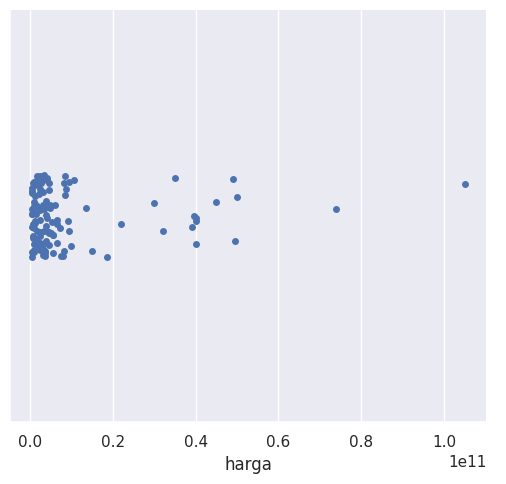

In [ ]:
p = sns.catplot(x = 'harga', data = dfJ1_cln)

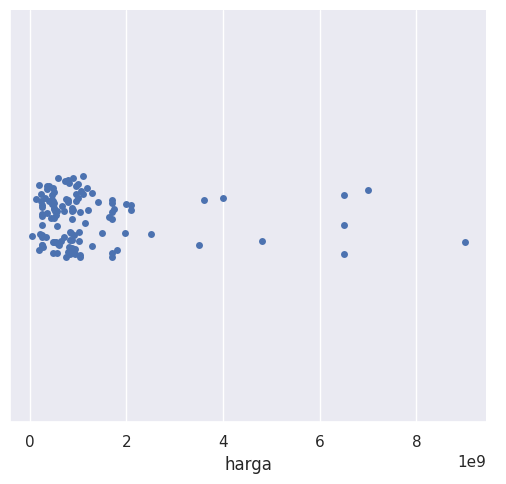

In [ ]:
p = sns.catplot(x = 'harga', data = dfD2)

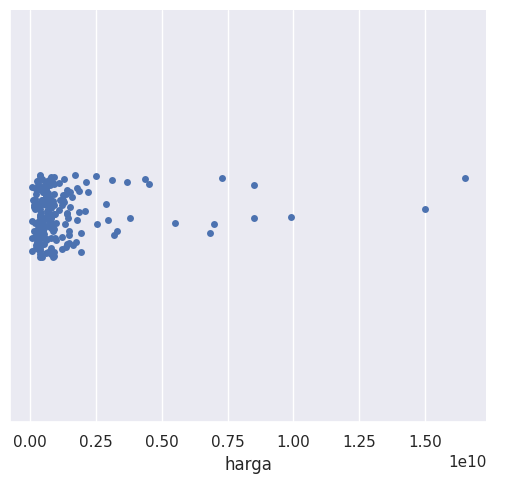

In [ ]:
p = sns.catplot(x = 'harga', data = dfB2)

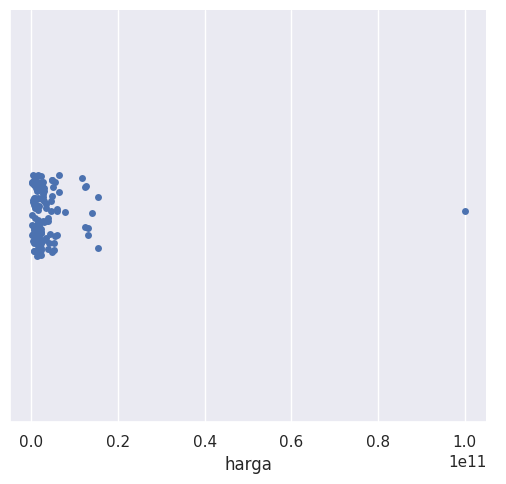

In [ ]:
p = sns.catplot(x = 'harga', data = dfT)

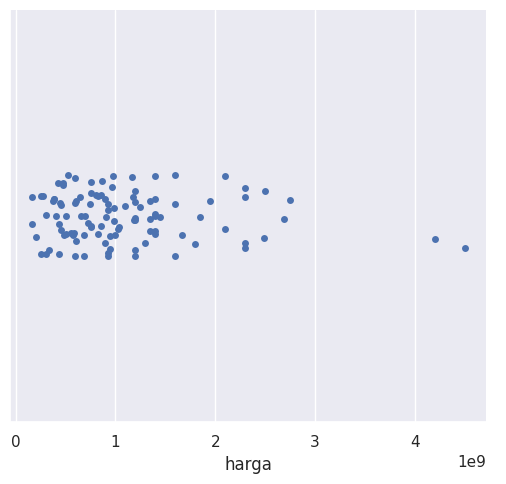

In [ ]:
p = sns.catplot(x = 'harga', data = dfX2)

# Hubungan harga berdasarkan lokasi di setiap kota

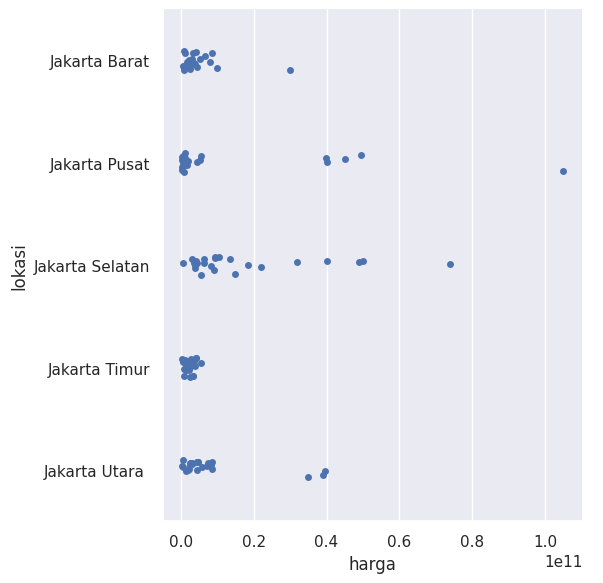

In [ ]:
# Mengubah ukuran plot dengan height dan aspect
p = sns.catplot(x='harga', y='lokasi', data=dfJ1_cln, height=6, aspect=1)

# Menampilkan plot
plt.show()


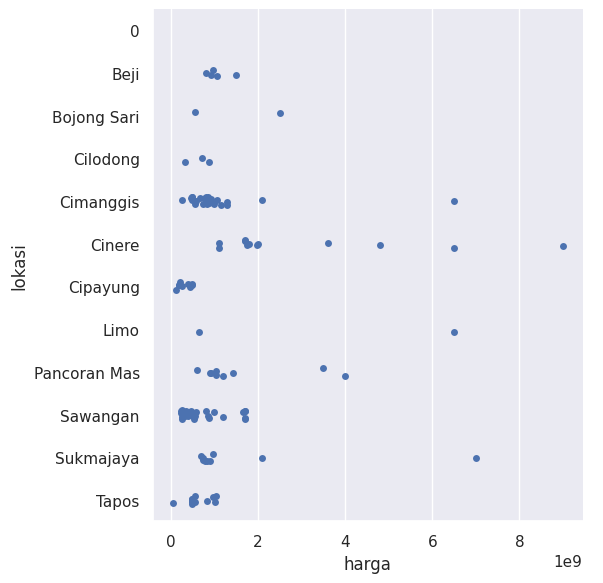

In [ ]:
# Mengubah ukuran plot dengan height dan aspect
p = sns.catplot(x='harga', y='lokasi', data=dfD2, height=6, aspect=1)

# Menampilkan plot
plt.show()

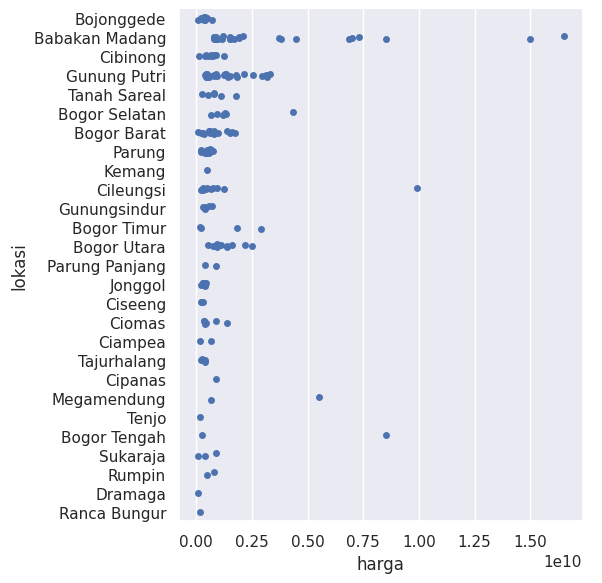

In [ ]:
# Mengubah ukuran plot dengan height dan aspect
p = sns.catplot(x='harga', y='lokasi', data=dfB2, height=6, aspect=1)

# Menampilkan plot
plt.show()

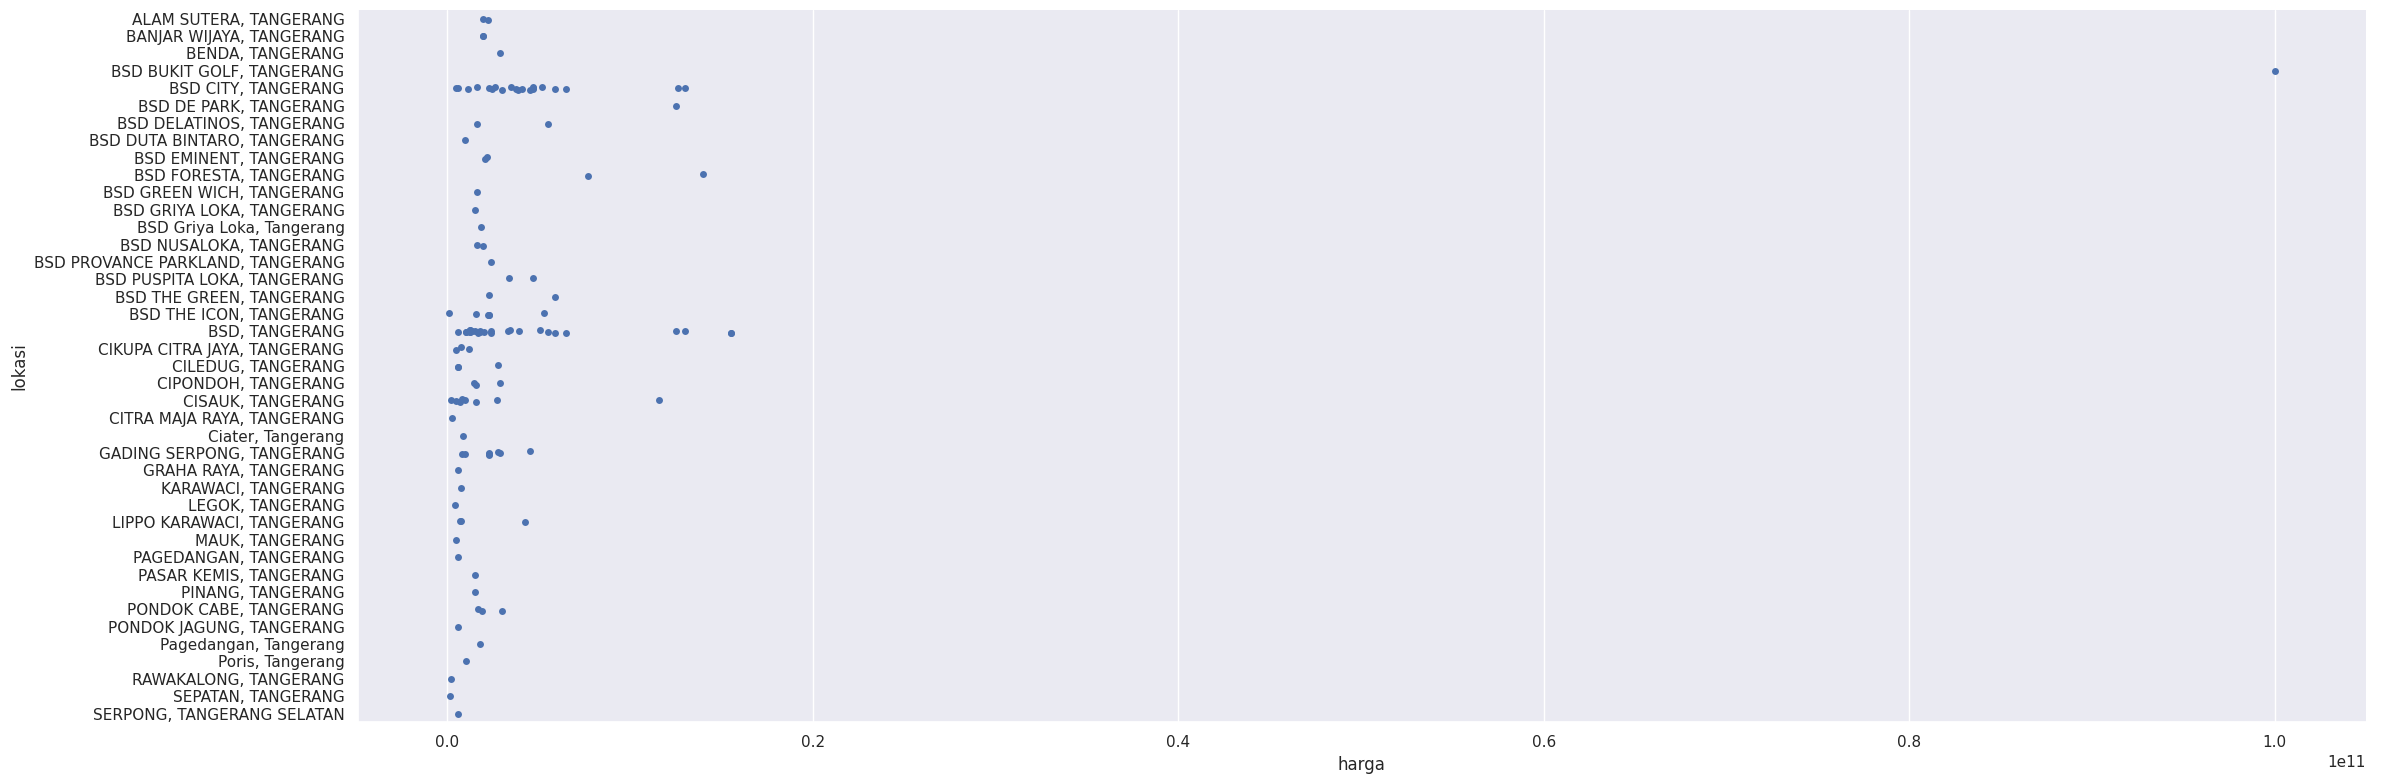

In [ ]:
# Mengubah ukuran plot dengan height dan aspect
p = sns.catplot(x='harga', y='lokasi', data=dfT, height=8, aspect=3)

# Menampilkan plot
plt.show()

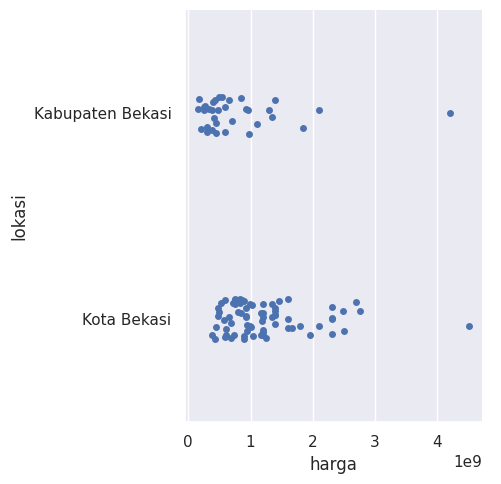

In [ ]:
# Mengubah ukuran plot dengan height dan aspect
p = sns.catplot(x='harga', y='lokasi', data=dfX2, height=5, aspect=1)

# Menampilkan plot
plt.show()

**Kesimpulan**


- Untuk kota Jakarta harga rumah paling tinggi berada di wilayah Jakarta Pusat dengan harga mencapai 1.050000e+11

- Untuk kota Depok harga rumah paling tinggi berada di wilayah Cinere dengan harga mencapai 9.000000e+09
- Untuk kota Bogor harga rumah paling tinggi berada di wilayah Babakan Madang dengan harga mencapai 1.650000e+10

- Untuk kota Tangerang harga rumah paling tinggi berada di wilayah BSD Bukit Golf dengan harga mencapai 100000000000.0

- Untuk kota Bekasi harga rumah paling tinggi berada di wilayah Kota Bekasi dengan harga mencapai 4.500000e+09

Berdasarkan kesimpulan daroi masing-masing Kota, dapat kita lihat bahwa harga rumah paling tinggi berada di Kota Jakarta

# Hubungan harga yang dipengaruhi oleh Luas Bangunan dan Lokasi di setiap Kota

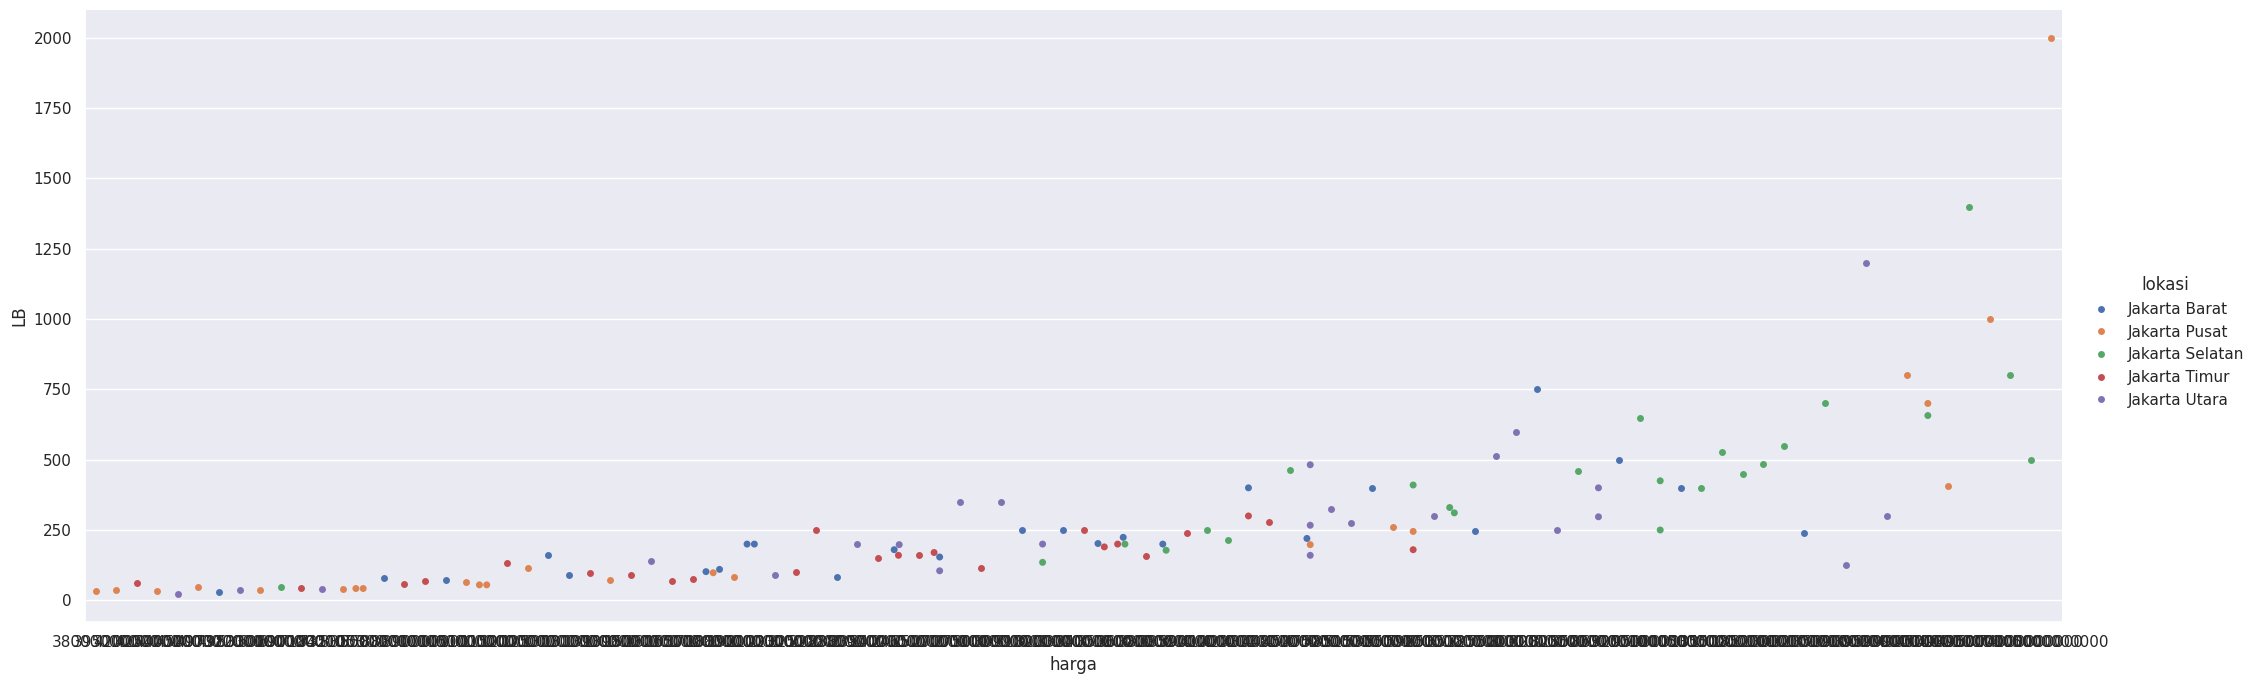

In [ ]:
# Mengubah ukuran plot dengan height dan aspect
p = sns.catplot(x="harga", y="LB", hue="lokasi", kind="swarm", data=dfJ1_cln, height=7, aspect=3)

# Menampilkan plot
plt.show()


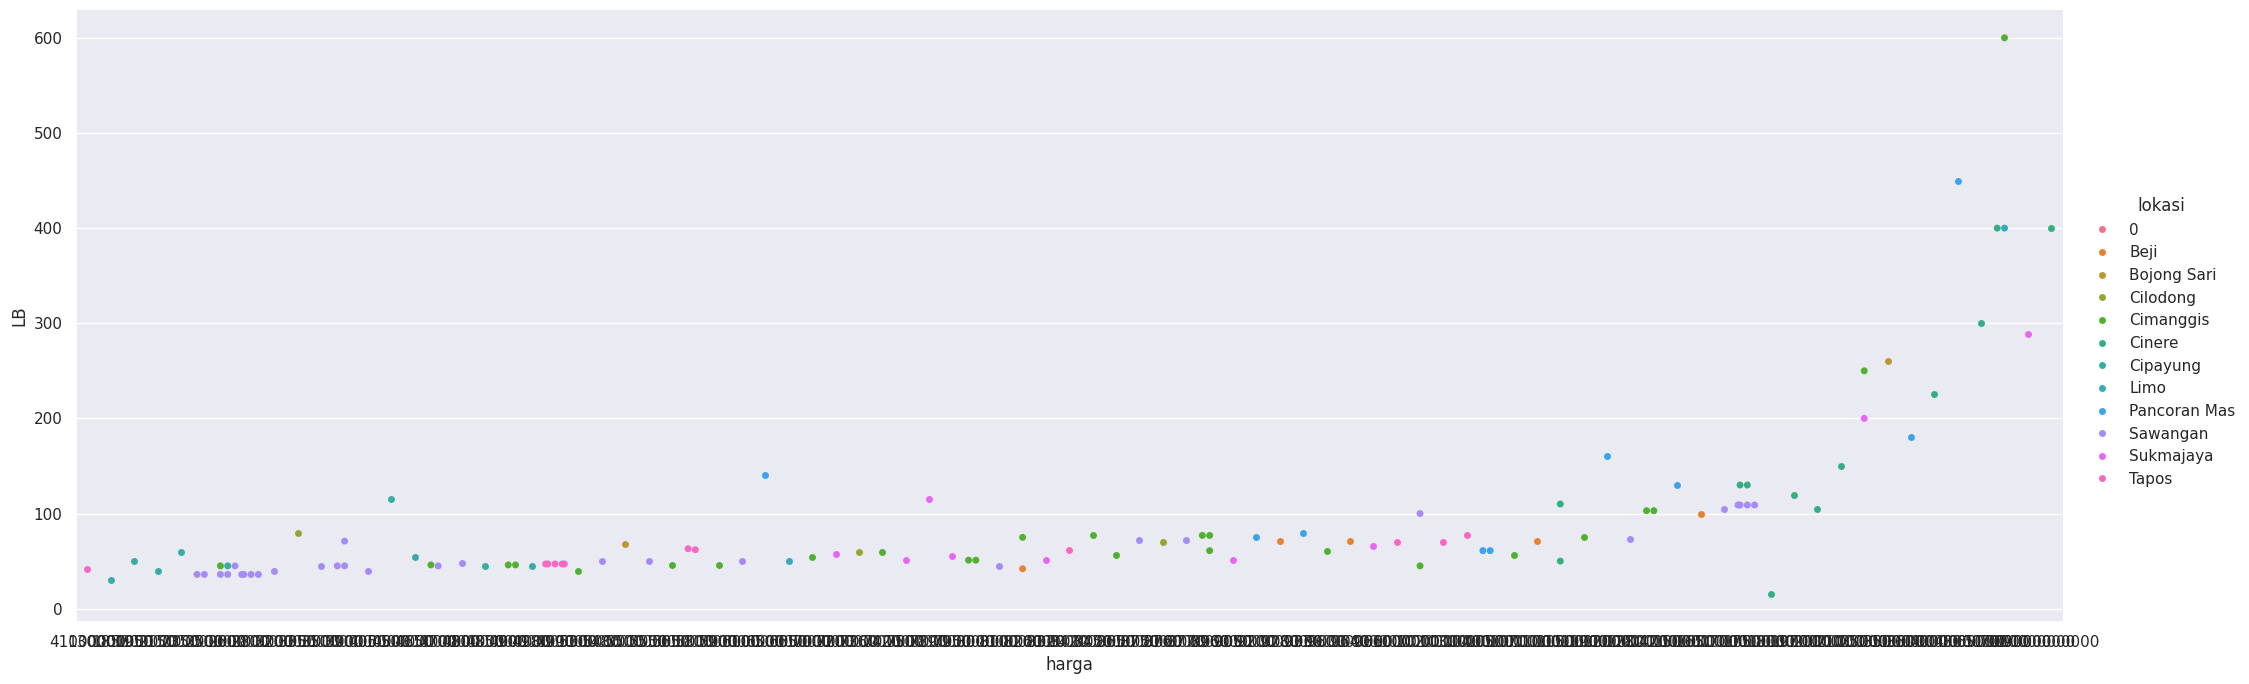

In [ ]:
# Mengubah ukuran plot dengan height dan aspect
p = sns.catplot(x="harga", y="LB", hue="lokasi", kind="swarm", data=dfD2, height=7, aspect=3)

# Menampilkan plot
plt.show()


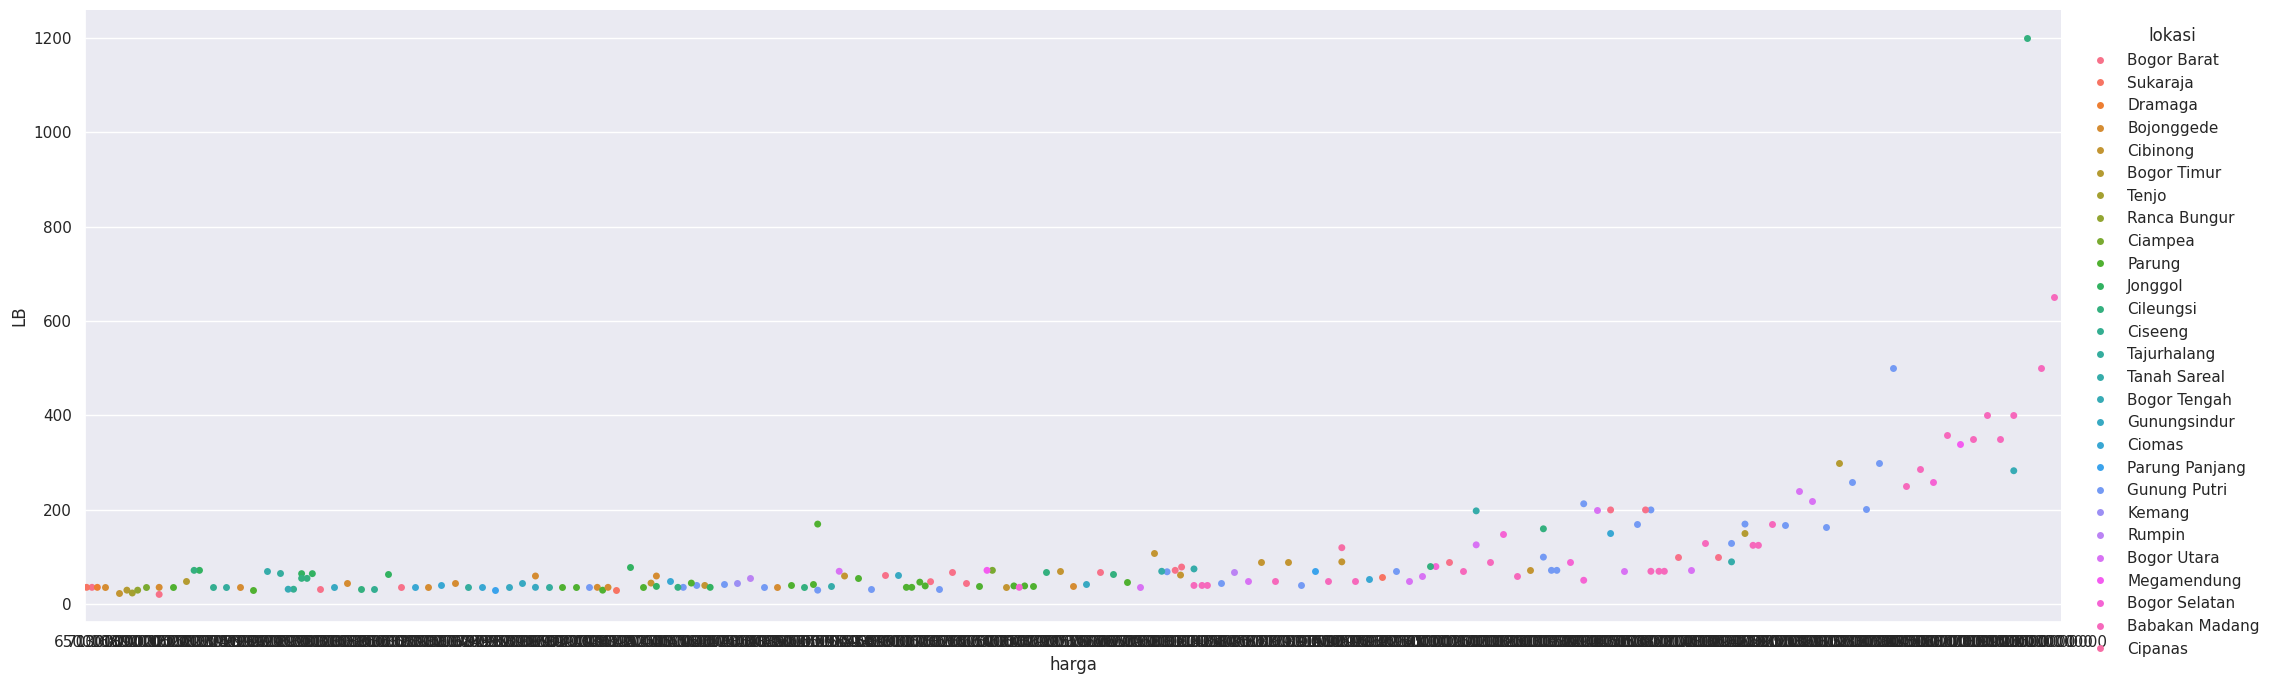

In [ ]:
# Mengubah ukuran plot dengan height dan aspect
p = sns.catplot(x="harga", y="LB", hue="lokasi", kind="swarm", data=dfB2, height=7, aspect=3)

# Menampilkan plot
plt.show()


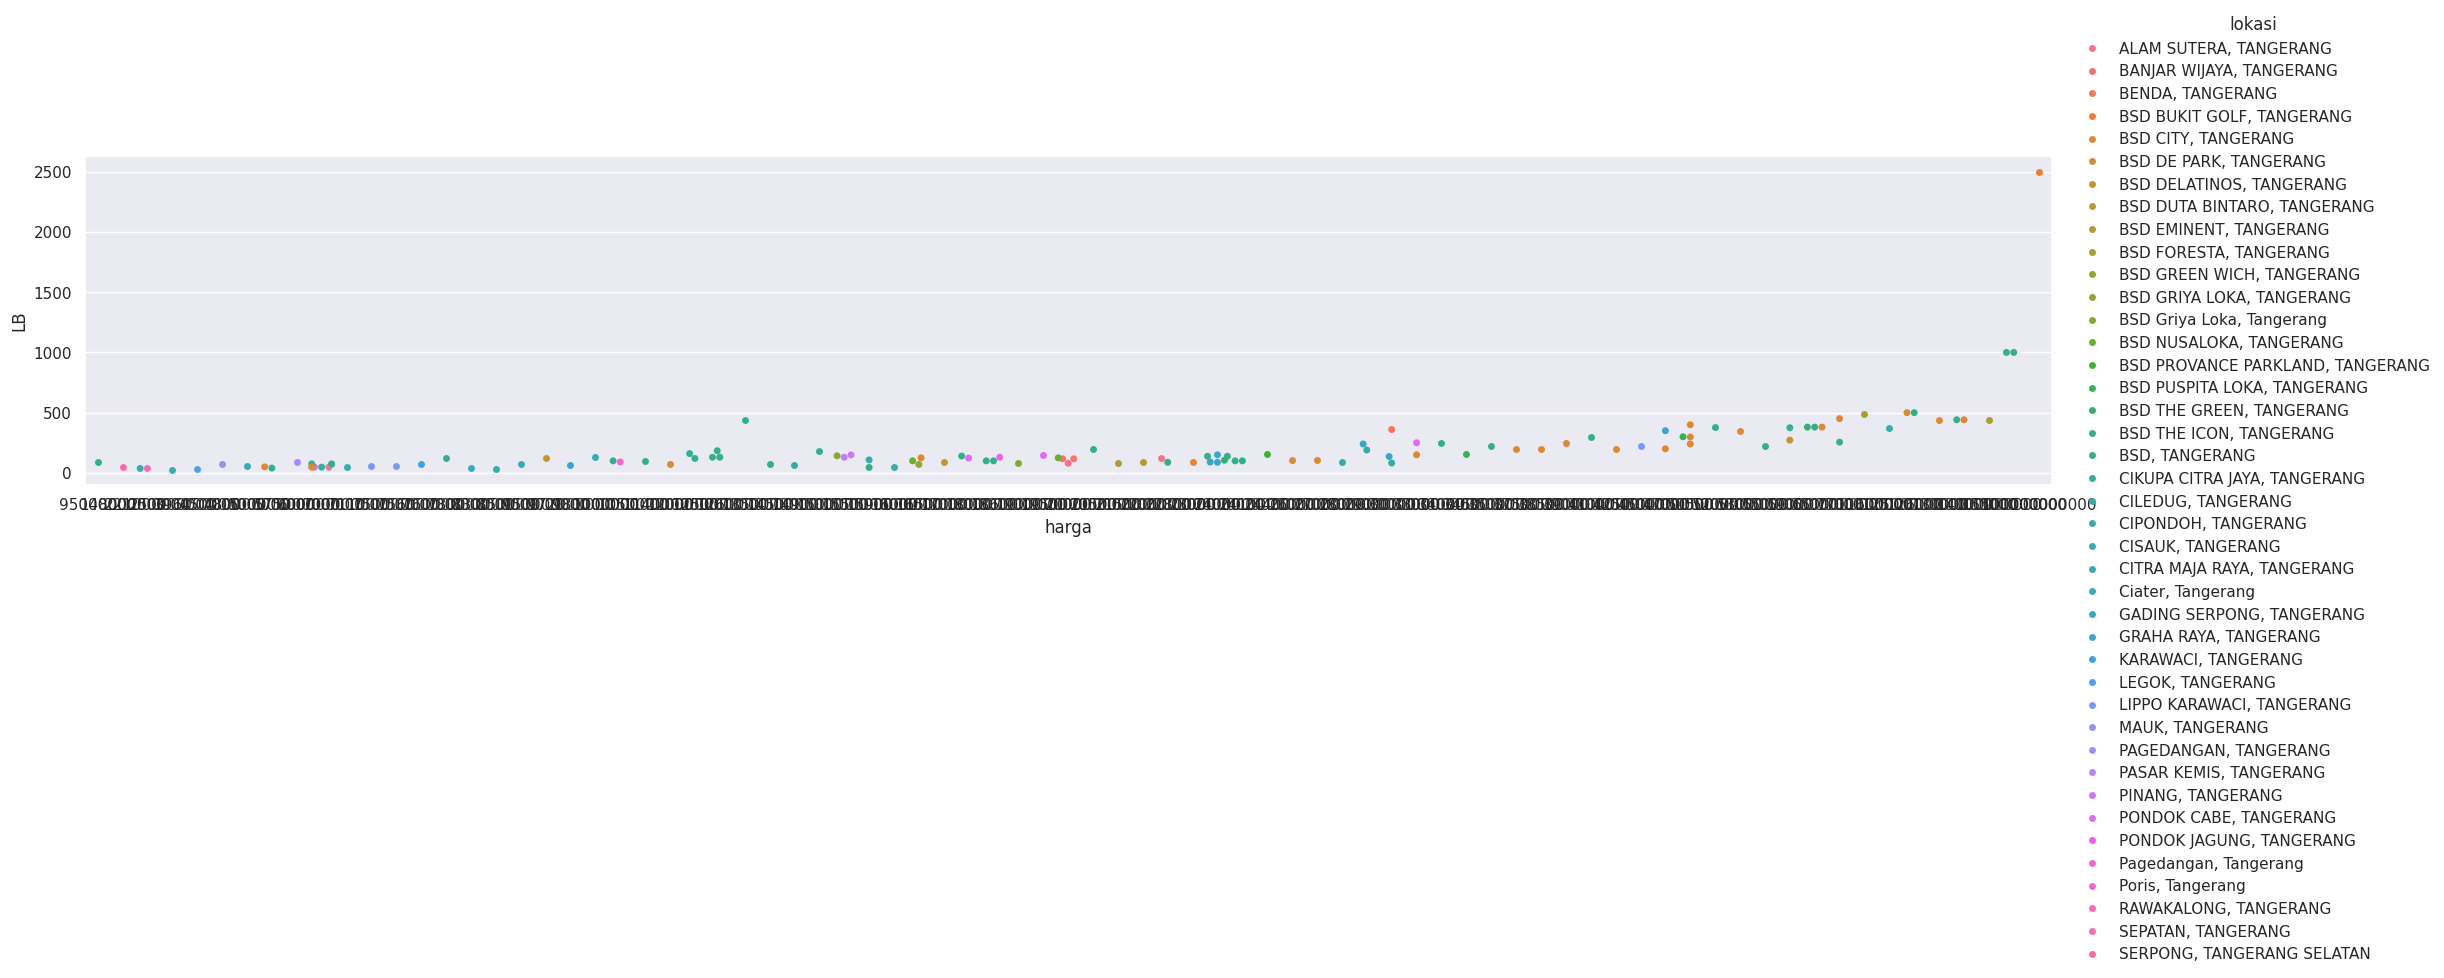

In [ ]:
# Mengubah ukuran plot dengan height dan aspect
p = sns.catplot(x="harga", y="LB", hue="lokasi", kind="swarm", data=dfT, height=7, aspect=3)

# Menampilkan plot
plt.show()


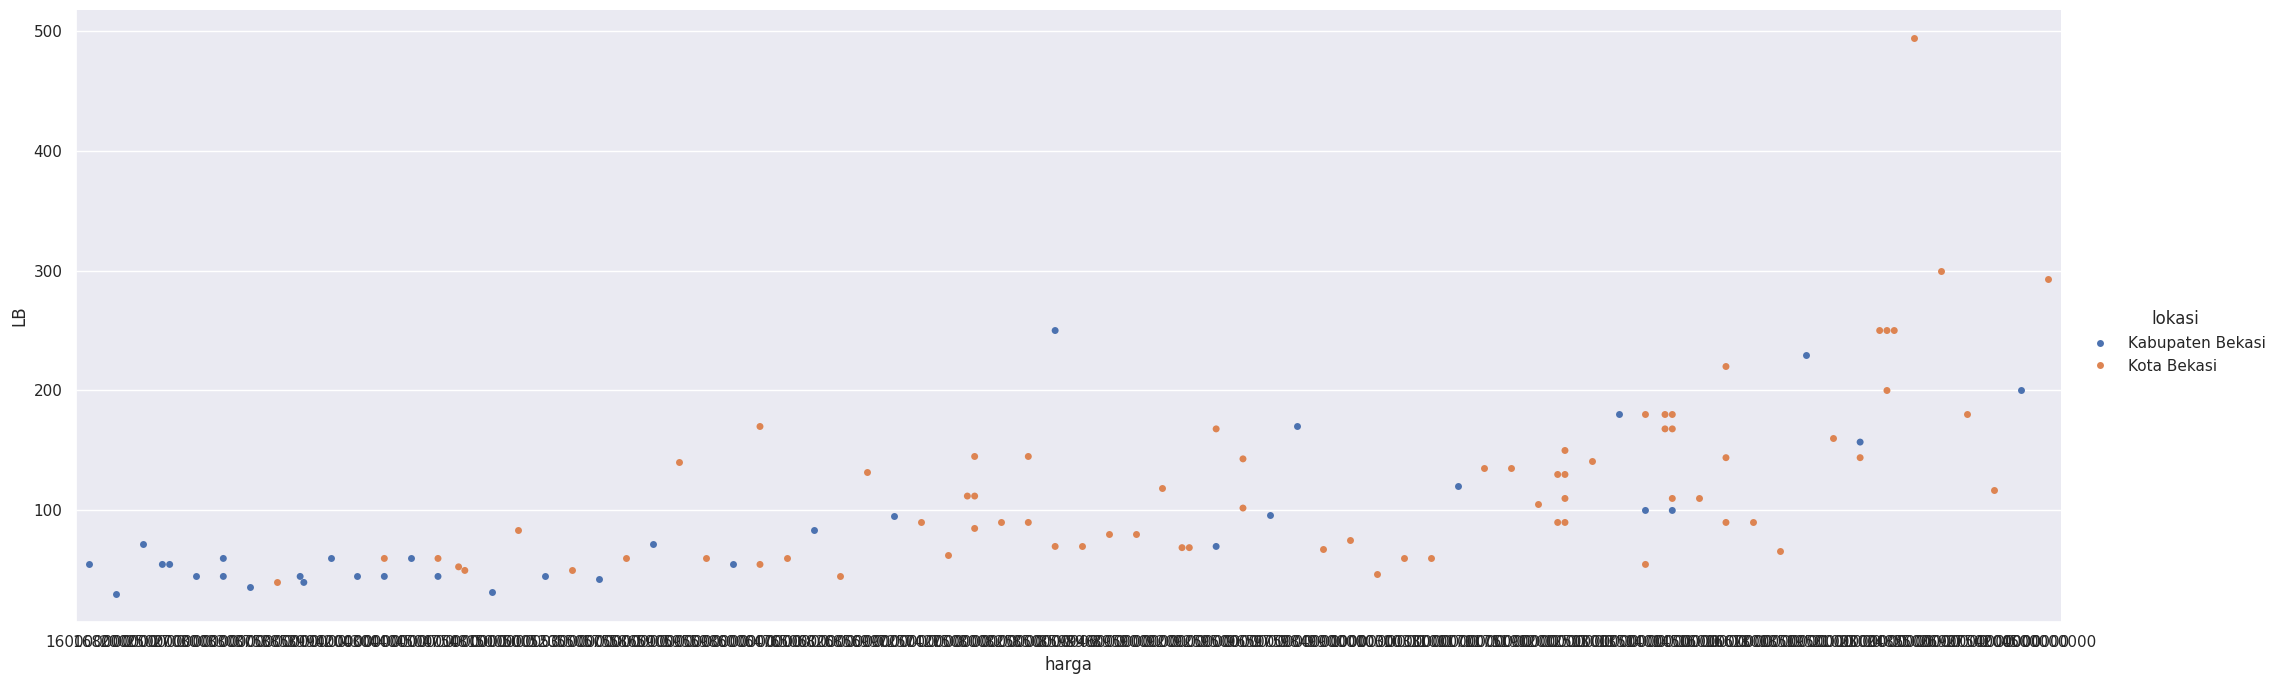

In [ ]:
# Mengubah ukuran plot dengan height dan aspect
p = sns.catplot(x="harga", y="LB", hue="lokasi", kind="swarm", data=dfX2, height=7, aspect=3)

# Menampilkan plot
plt.show()

**Kesimpulan**


- Untuk kota Jakarta Luas Bangunan paling tinggi berada di wilayah Jakarta Pusat dengan harga mencapai 1.050000e+11

- Untuk kota Depok luas bangunan paling tinggi berada di wilayah Cimanggis dengan harga mencapai 9.000000e+09

- Untuk kota Bogor luas bangunan paling tinggi berada di wilayah Cileungsi 9.900000e+09

- Untuk kota Tangerang luas bangunan paling tinggi berada di wilayah BSD Bukit Golf dengan harga mencapai 100000000000.0

- Untuk kota Bekasi luas bangunan paling tinggi berada di wilayah Kota Bekasi dengan harga mencapai 4.500000e+09

Berdasarkan kesimpulan dari masing-masing Kota, dapat kita lihat bahwa harga rumah paling tinggi berada di Kota Jakarta

# Hubungan harga yang dipengaruhi oleh Luas Tanah dan Lokasi di setiap Kota

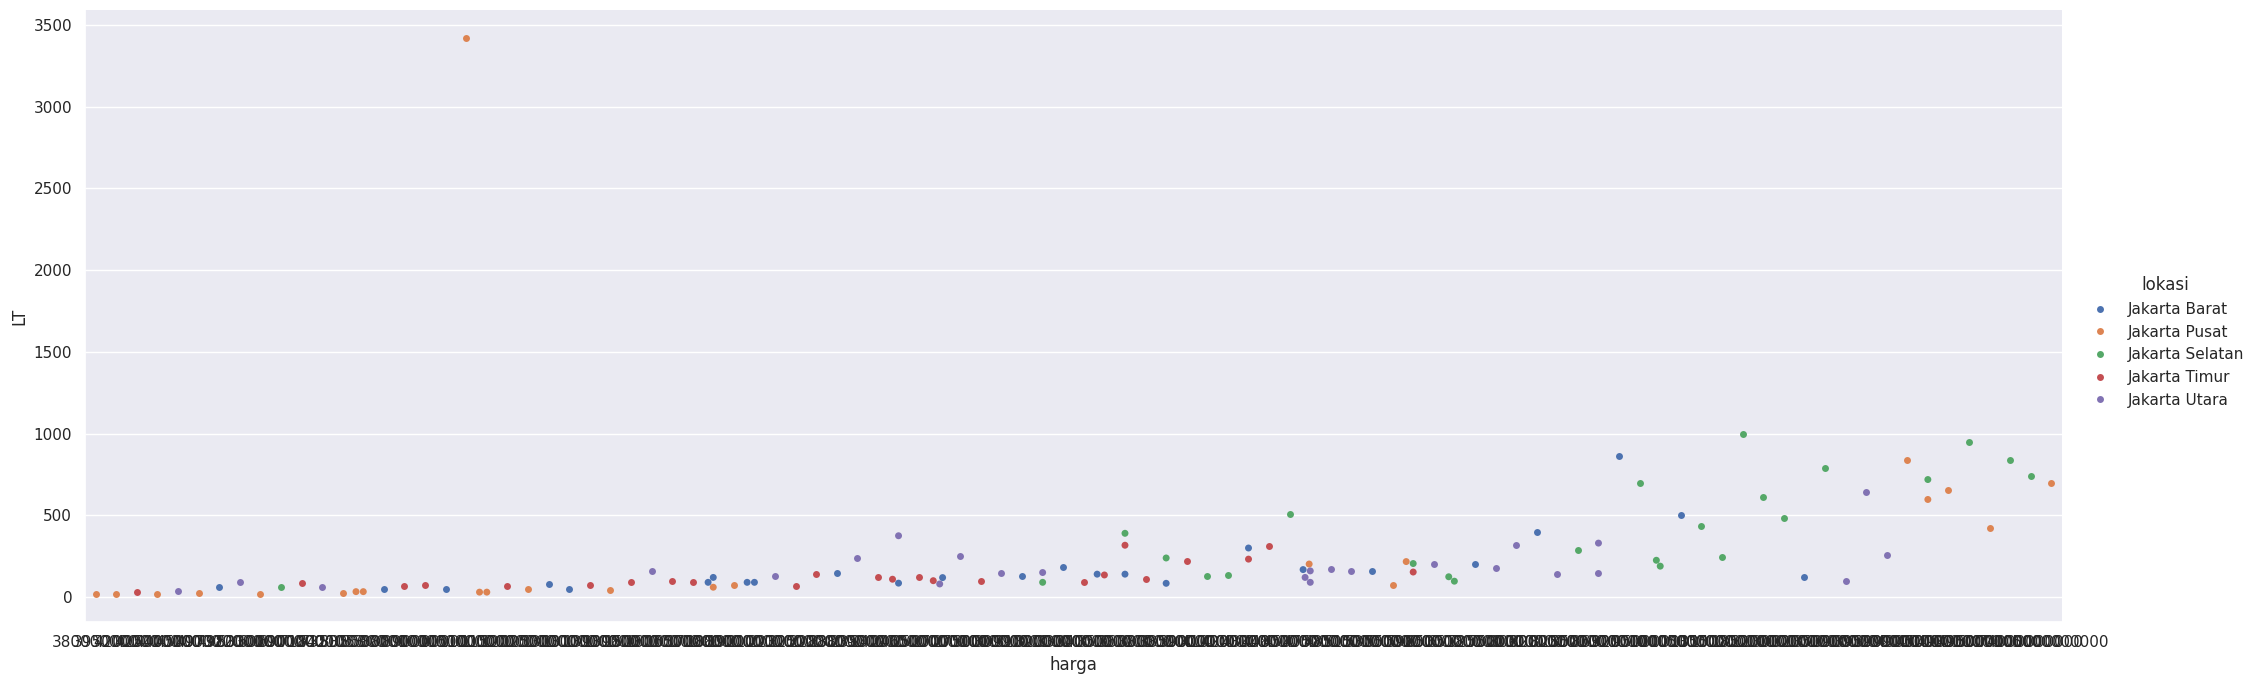

In [ ]:
# Mengubah ukuran plot dengan height dan aspect
p = sns.catplot(x="harga", y="LT", hue="lokasi", kind="swarm", data=dfJ1_cln, height=7, aspect=3)

# Menampilkan plot
plt.show()

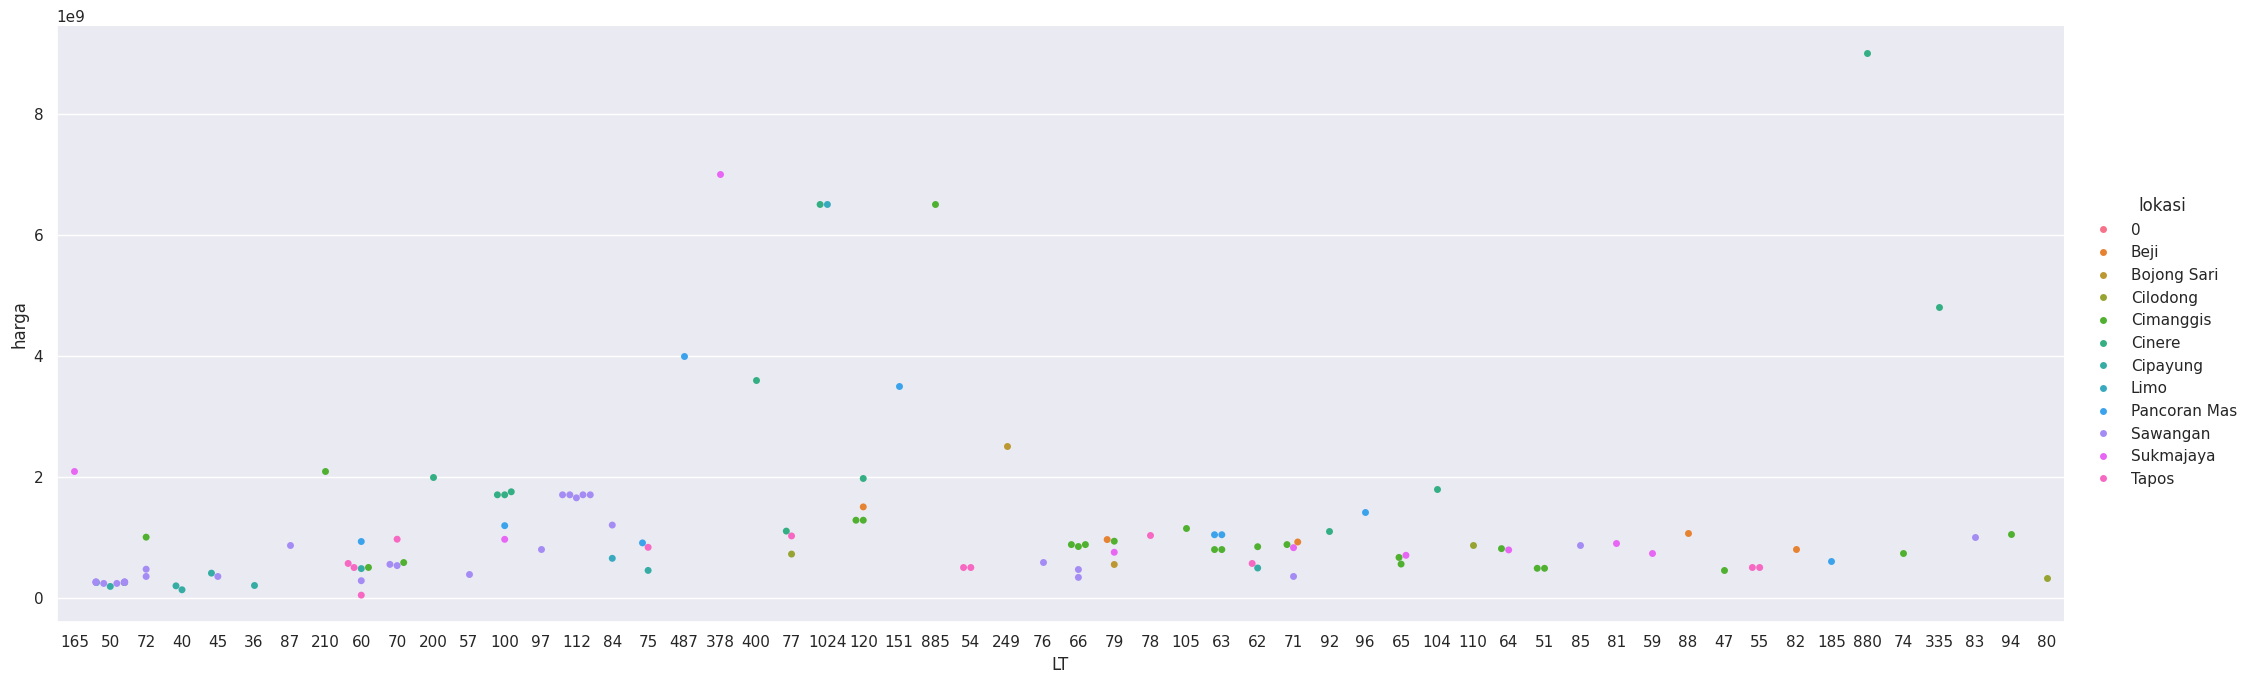

In [ ]:
# Mengubah ukuran plot dengan height dan aspect
p = sns.catplot(x="LT", y="harga", hue="lokasi", kind="swarm", data=dfD2, height=7, aspect=3)

# Menampilkan plot
plt.show()

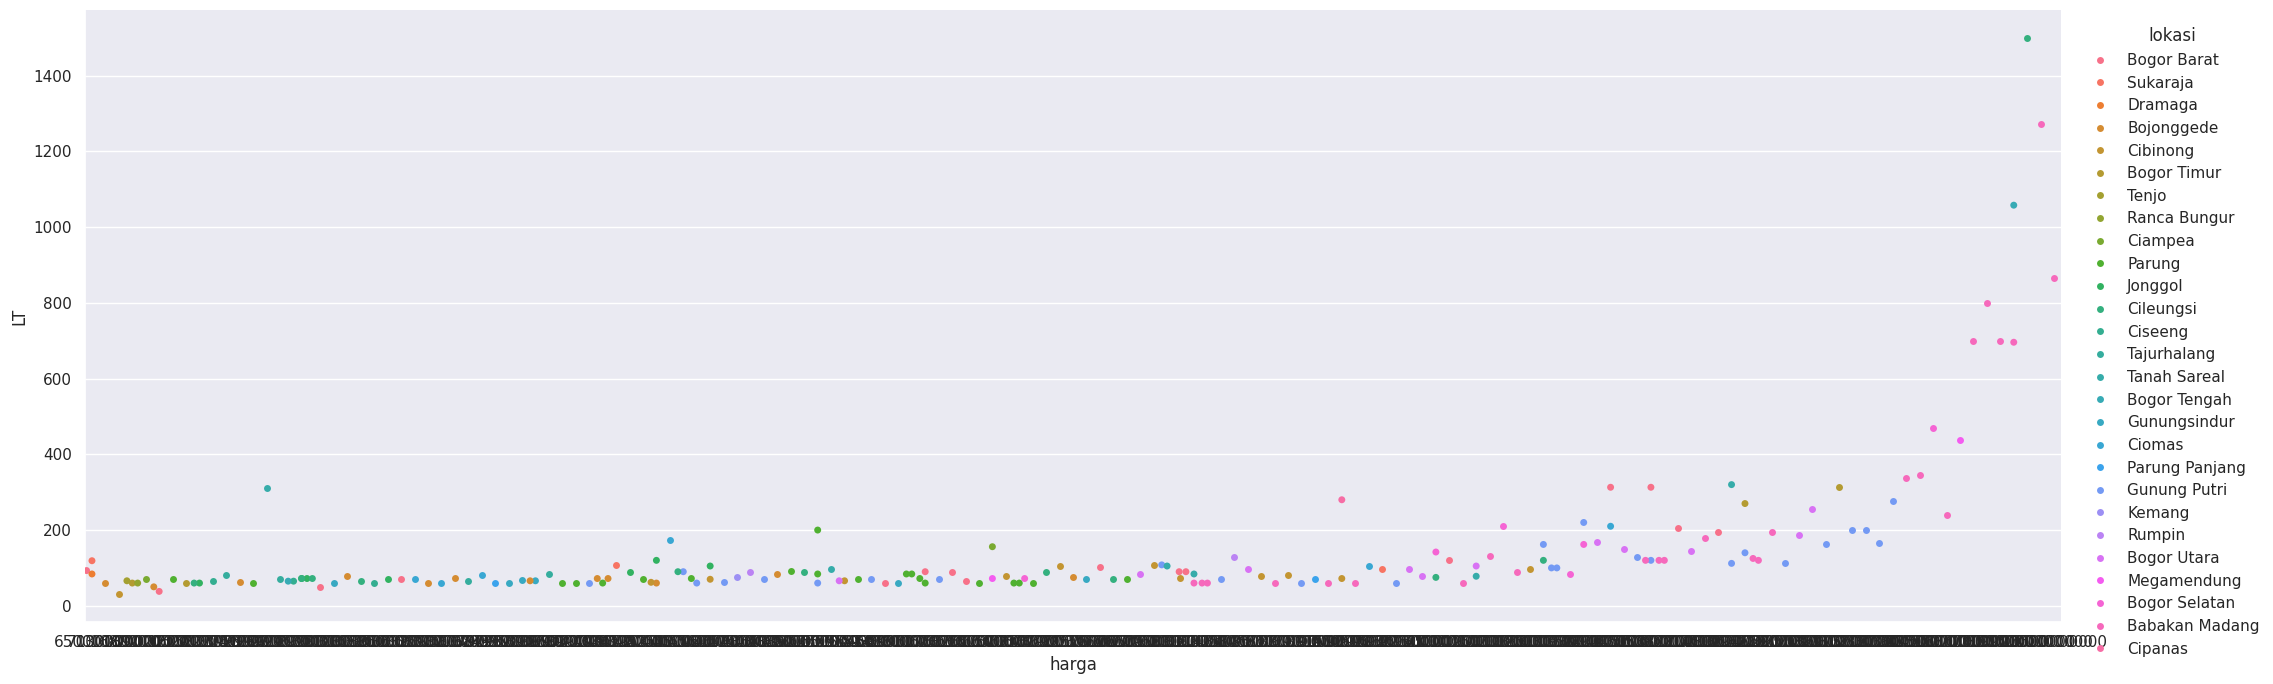

In [ ]:
# Mengubah ukuran plot dengan height dan aspect
p = sns.catplot(x="harga", y="LT", hue="lokasi", kind="swarm", data=dfB2, height=7, aspect=3)

# Menampilkan plot
plt.show()

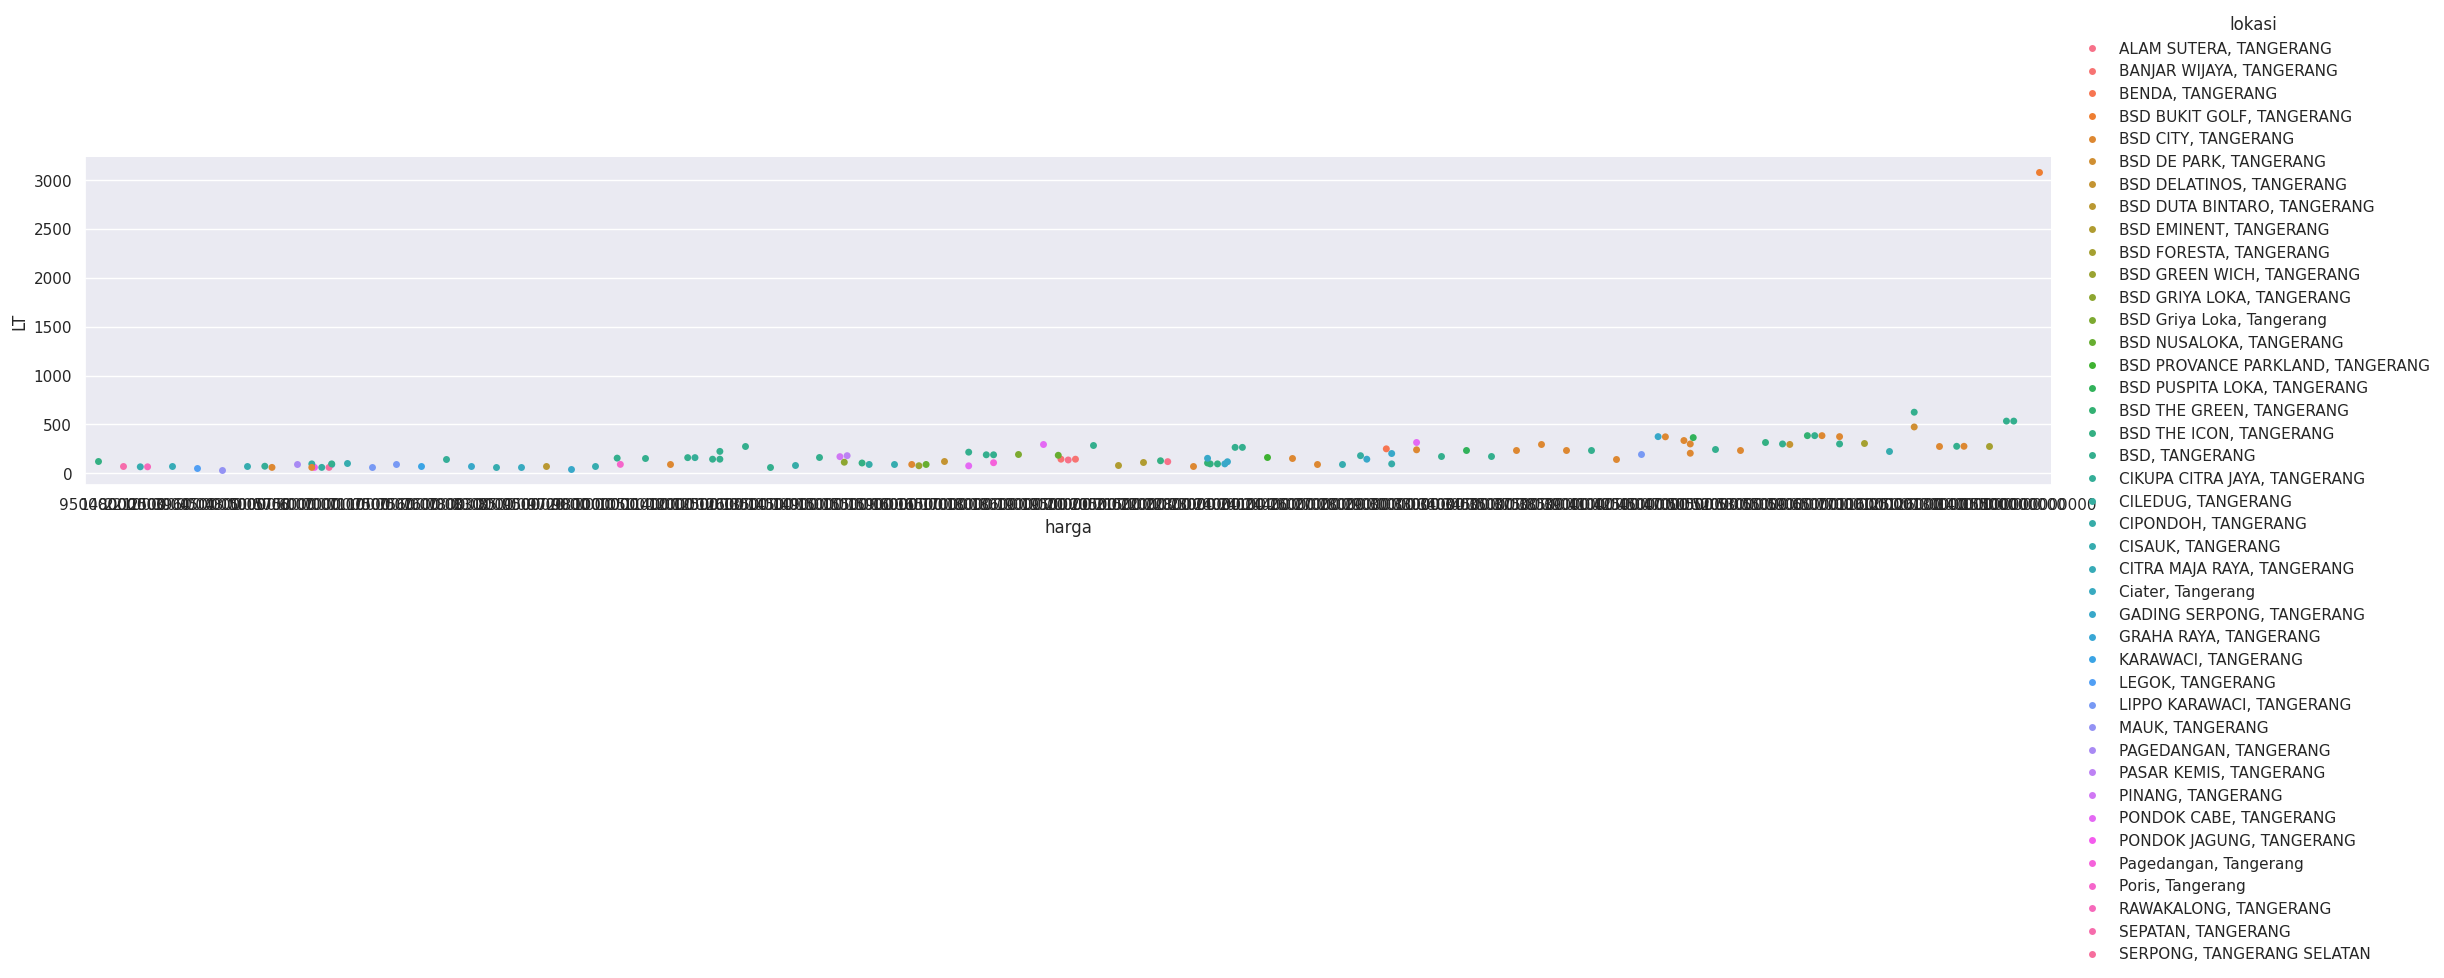

In [ ]:
# Mengubah ukuran plot dengan height dan aspect
p = sns.catplot(x="harga", y="LT", hue="lokasi", kind="swarm", data=dfT, height=7, aspect=3)

# Menampilkan plot
plt.show()

In [ ]:
# Mendapatkan data dengan nilai LT tertinggi
lokasi_LT_tertinggi =  dfT[ dfT['LT'] == dfT['LT'].max()]

# Menampilkan lokasi dan LB tertinggi
print(lokasi_LT_tertinggi[['lokasi', 'LT', 'harga']])

                        lokasi      LT         harga
100  BSD BUKIT GOLF, TANGERANG  3087.0  100000000000


**Kesimpulan**

- Untuk kota Jakarta Luas tanah paling tinggi berada di wilayah Jakarta Pusat dengan harga mencapai 1.050000e+11

- Untuk kota Depok luas tanah paling tinggi berada di wilayah Cimanggis dengan harga mencapai 9.000000e+09

- Untuk kota Bogor luas tanah paling tinggi berada di wilayah Cileungsi dengan harga mencapai 9.900000e+09

- Untuk kota Tangerang luas tanah paling tinggi berada di wilayah BSD Bukit Golf dengan harga mencapai 100000000000.0

- Untuk kota Bekasi luas tanah paling tinggi berada di wilayah Kota Bekasi dengan harga mencapai 4.500000e+09

Berdasarkan kesimpulan dari masing-masing Kota, dapat kita lihat bahwa harga rumah paling tinggi berada di Kota Jakarta

 **1. Kualitas data yang dimiliki perusahaan.**

Setelah dilakukan Data Preprocessing, masih ditemukan banyak missing value pada data, juga masih banyak di temukan duplikat data sehingga data yang dihasilkan hanya sekitar 15%.

Dan untuk variabel terdapat beberapa variabel yang tidak jelas(unnamed) yang tidak ada kaitannya dengan kriteria rumah yang di jual.

 **2. Apakah ada saran perbaikan data ke DE/DBA perusahaan agar RPPI menjadi data driven company yang unggul.**

Masih terdapat banyak missing value pada variabel-variabel yang memuat informasi penting sehingga kualitas data tidak komprehensif/menyeluruh. Bahkan data yang kosong memiliki persentasi di atas 50% dari total keseluruhan data. Contohnya ada pada data rumah di Jakarta dan Depok. Saran untuk DE/DBA yaitu perlu dilakukan survey yang lebih mendalam supaya informasi yang didapatkan akurat, benar, dan lengkap.

Untuk tim **DE** di perusahaan, disarankan untuk mengurangi kesalahan dalam proses penginputan data, sehingga data yang dihasilkan lebih bersih dan siap untuk diolah dengan lebih efisien.

**3. Dari data yang ada, apakah ada kecenderungan rumah disuatu kota lebih mahal/murah dibandingkan kota lain?**

In [ ]:
if dfB2['harga'].mean() > dfX2['harga'].mean(): # Calculate the average price for each city
    print("Kota bogor lebih mahal dibandingkan Kota Bekasi.")
elif dfB2['harga'].mean() < dfX2['harga'].mean():
    print("Kota Bekasi lebih mahal dibandingkan Kota Bogor.")
else:
    print("Kota Bogor dan Kota Bekasi memiliki harga penjualan yang sama.")

Kota bogor lebih mahal dibandingkan Kota Bekasi.


In [ ]:
if dfB2['harga'].mean() > dfJ1_cln['harga'].mean(): # Calculate the average price for each city
    print("Kota bogor lebih mahal dibandingkan Kota Jakarta.")
elif dfB2['harga'].mean() < dfJ1_cln['harga'].mean():
    print("Kota Jakarta lebih mahal dibandingkan Kota Bogor.")
else:
    print("Kota Bogor dan Kota Jakarta memiliki harga penjualan yang sama.")

Kota Jakarta lebih mahal dibandingkan Kota Bogor.


In [ ]:
if dfD2['harga'].mean() > dfT['harga'].mean(): # Calculate the average price for each city
    print("Kota Depok lebih mahal dibandingkan Kota Tangerang.")
elif dfD2['harga'].mean() < dfT['harga'].mean():
    print("Kota Tangerang lebih mahal dibandingkan Kota Depok.")
else:
    print("Kota Depok dan Kota Tangerang memiliki harga penjualan yang sama.")

Kota Tangerang lebih mahal dibandingkan Kota Depok.


In [ ]:
if dfJ1_cln['harga'].mean() > dfT['harga'].mean(): # Calculate the average price for each city
    print("Kota Jakarta lebih mahal dibandingkan Kota Tangerang.")
elif dfJ1_cln['harga'].mean() < dfT['harga'].mean():
    print("Kota Tangerang lebih mahal dibandingkan Kota Jakarta.")
else:
    print("Kota Jakarta dan Kota Tangerang memiliki harga penjualan yang sama.")

Kota Jakarta lebih mahal dibandingkan Kota Tangerang.


**4. Dari data yang ada, apakah bisa dibuat rekomendasi sebaiknya RPPI membuat kantor cabang berikutnya di kota mana? Mengapa? (Asumsikan RPPI belum memiliki cabang di kota-kota yang disebutkan di data)**

Berdasarkan visualisasi di atas, disarankan untuk membuka cabang baru di Kota Depok. Hal ini didukung oleh banyaknya rumah dengan kisaran harga yang sesuai bagi calon pembeli. Selain itu, meskipun luas tanah dan bangunan di Depok relatif besar, harga properti tetap tergolong rendah, sehingga menawarkan peluang pasar yang potensial untuk ekspansi usaha.



In [ ]:
result = dfD2[dfD2['lokasi'] == 'Cimanggis']
result

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
3,2021-06-12 00:00:00,50,45.0,2.0,1.0,0.0,0.0,Cimanggis,SHM,1300.0,0,250000000,https://www.rumah123.com/properti/depok/hos928...,RUMAH SIAP HUNI HARGA NEGO DEKAT STASIUN CITAYAM
11,2021-06-12 00:00:00,210,250.0,4.0,4.0,1.0,1.0,Cimanggis,SHM,0.0,Utara,2100000000,https://www.rumah123.com/properti/depok/hos928...,RUMAH DALAM KOMPLEK BESAR. JLN LEBAR. DEPOK
16,2021-06-12 00:00:00,60,40.0,2.0,1.0,0.0,1.0,Cimanggis,SHM,1300.0,Timur,499000000,https://www.rumah123.com/properti/depok/hos928...,RUMAH DI CIBUBUR CIKEAS DP RINGAN CICILAN FLAT...
30,2021-05-12 00:00:00,120,103.0,4.0,2.0,0.0,2.0,Cimanggis,SHM,2200.0,0,1280000000,https://www.rumah123.com/properti/depok/hos928...,Rumah Strategis 2 Lantai Bebas Banjir Dekat LR...
33,2021-05-12 00:00:00,885,600.0,7.0,4.0,2.0,2.0,Cimanggis,SHM,6600.0,0,6500000000,https://www.rumah123.com/properti/depok/hos928...,"Rumah luas tanah besar, kolam renang dan taman..."
50,2021-05-12 00:00:00,105,75.0,2.0,1.0,0.0,0.0,Cimanggis,SHM,1300.0,0,1150000000,https://www.rumah123.com/properti/depok/hos928...,Dijual rumah cantik Grand Depok city
51,2021-05-12 00:00:00,63,51.0,2.0,2.0,0.0,2.0,Cimanggis,SHM,2200.0,Barat,795000000,https://www.rumah123.com/properti/depok/hos928...,"Hunian 2 Lantai Gaya Bali Lokasi Strategis 1,4..."
54,2021-05-12 00:00:00,71,61.0,3.0,2.0,0.0,2.0,Cimanggis,SHM,2200.0,Barat,877000000,https://www.rumah123.com/properti/depok/hos928...,Hunian 2 Lantai Gaya Bali Lokasi 5 Menit Ke To...
58,2021-05-12 00:00:00,66,77.0,3.0,2.0,0.0,1.0,Cimanggis,SHM,2200.0,0,877000000,https://www.rumah123.com/properti/depok/hos928...,Rumah Townhouse 2 Lantai Almeria Premiere Cima...
60,2021-05-12 00:00:00,62,77.0,3.0,2.0,0.0,1.0,Cimanggis,SHM,2200.0,0,842000000,https://www.rumah123.com/properti/depok/hos928...,Rumah Townhouse 2 Lantai Almeria Premiere Cima...


**5. Rumah dengan karakteristik seperti apa yang paling banyak dijual?**


Setelah membuka cabang baru di Cimanggis, Depok, kami menemukan bahwa banyak rumah yang ditawarkan memiliki tipe dua lantai dengan luas tanah yang cukup luas dan bernuansa lokal. Lokasi strategis menjadi salah satu keunggulan, di mana banyak properti menekankan akses mudah ke fasilitas umum seperti stasiun kereta, pusat perbelanjaan, dan pusat kota. Beberapa rumah juga dijual dalam kondisi siap huni, yang berarti rumah tersebut sudah dalam keadaan baik dan tidak memerlukan renovasi besar.

**6.Jika RPPI ingin melakukan investasi (max) Rp. 25 Milyar minggu besok, apakah dari data anda dapat memberikan rekomendasi rumah mana saja yang akan berpotensi menghasilkan keuntungan bagi perusahaan?**

In [ ]:
# dfX2 = pdfX2.DataFrame({...})  # DataFrame yang sudah ada

anggaran = 25000000000  # Total anggaran
rekomendasi_rumah = dfJ1_cln[dfJ1_cln['harga'] <= anggaran]  # Filter berdasarkan harga

# Urutkan berdasarkan harga dari yang terendah
rekomendasi_rumah = rekomendasi_rumah.sort_values(by='harga')

total_harga = 0
jumlah_rumah = 0

# Hitung jumlah rumah yang dapat dibeli hingga total anggaran tercapai
for index, row in rekomendasi_rumah.iterrows():
    if total_harga + row['harga'] <= anggaran:
        total_harga += row['harga']
        jumlah_rumah += 1
    else:
        break  # Jika sudah melebihi anggaran, keluar dari loop

print(f"Jumlah rumah yang dapat dibeli: {jumlah_rumah}")
print(f"Total pengeluaran: {total_harga}")

Jumlah rumah yang dapat dibeli: 29
Total pengeluaran: 24319743053


In [ ]:
# dfX2 = pdfX2.DataFrame({...})  # DataFrame yang sudah ada

anggaran = 25000000000  # Total anggaran
rekomendasi_rumah = dfD2[dfD2['harga'] <= anggaran]  # Filter berdasarkan harga

# Urutkan berdasarkan harga dari yang terendah
rekomendasi_rumah = rekomendasi_rumah.sort_values(by='harga')

total_harga = 0
jumlah_rumah = 0

# Hitung jumlah rumah yang dapat dibeli hingga total anggaran tercapai
for index, row in rekomendasi_rumah.iterrows():
    if total_harga + row['harga'] <= anggaran:
        total_harga += row['harga']
        jumlah_rumah += 1
    else:
        break  # Jika sudah melebihi anggaran, keluar dari loop

print(f"Jumlah rumah yang dapat dibeli: {jumlah_rumah}")
print(f"Total pengeluaran: {total_harga}")

Jumlah rumah yang dapat dibeli: 56
Total pengeluaran: 24725000000


In [ ]:
# dfX2 = pdfX2.DataFrame({...})  # DataFrame yang sudah ada

anggaran = 25000000000  # Total anggaran
rekomendasi_rumah = dfB2[dfB2['harga'] <= anggaran]  # Filter berdasarkan harga

# Urutkan berdasarkan harga dari yang terendah
rekomendasi_rumah = rekomendasi_rumah.sort_values(by='harga')

total_harga = 0
jumlah_rumah = 0

# Hitung jumlah rumah yang dapat dibeli hingga total anggaran tercapai
for index, row in rekomendasi_rumah.iterrows():
    if total_harga + row['harga'] <= anggaran:
        total_harga += row['harga']
        jumlah_rumah += 1
    else:
        break  # Jika sudah melebihi anggaran, keluar dari loop

print(f"Jumlah rumah yang dapat dibeli: {jumlah_rumah}")
print(f"Total pengeluaran: {total_harga}")

Jumlah rumah yang dapat dibeli: 74
Total pengeluaran: 24619527361


In [ ]:
# dfX2 = pdfX2.DataFrame({...})  # DataFrame yang sudah ada

anggaran = 25000000000  # Total anggaran
rekomendasi_rumah = dfT[dfT['harga'] <= anggaran]  # Filter berdasarkan harga

# Urutkan berdasarkan harga dari yang terendah
rekomendasi_rumah = rekomendasi_rumah.sort_values(by='harga')

total_harga = 0
jumlah_rumah = 0

# Hitung jumlah rumah yang dapat dibeli hingga total anggaran tercapai
for index, row in rekomendasi_rumah.iterrows():
    if total_harga + row['harga'] <= anggaran:
        total_harga += row['harga']
        jumlah_rumah += 1
    else:
        break  # Jika sudah melebihi anggaran, keluar dari loop

print(f"Jumlah rumah yang dapat dibeli: {jumlah_rumah}")
print(f"Total pengeluaran: {total_harga}")

Jumlah rumah yang dapat dibeli: 36
Total pengeluaran: 24915000000


In [ ]:
# Misalkan dfD adalah DataFrame yang berisi data rumah
# dfX2 = pdfX2.DataFrame({...})  # DataFrame yang sudah ada

anggaran = 25000000000  # Total anggaran
rekomendasi_rumah = dfX2[dfX2['harga'] <= anggaran]  # Filter berdasarkan harga

# Urutkan berdasarkan harga dari yang terendah
rekomendasi_rumah = rekomendasi_rumah.sort_values(by='harga')

total_harga = 0
jumlah_rumah = 0

# Hitung jumlah rumah yang dapat dibeli hingga total anggaran tercapai
for index, row in rekomendasi_rumah.iterrows():
    if total_harga + row['harga'] <= anggaran:
        total_harga += row['harga']
        jumlah_rumah += 1
    else:
        break  # Jika sudah melebihi anggaran, keluar dari loop

print(f"Jumlah rumah yang dapat dibeli: {jumlah_rumah}")
print(f"Total pengeluaran: {total_harga}")

Jumlah rumah yang dapat dibeli: 47
Total pengeluaran: 24317153000


Dari hasil membandingkan pembelian rumah di masing-masing kota, total rumah yang bisa dibeli paling banyak oleh perusahaan terletak di kota Tangerang. Karena dengan invest uang 25 Milyar, semakin banyak rumah yang bisa ditawarkan juga maka akan bisa semakin menguntungkan untuk perusahaan

 **7. Informasi berharga apa lagi yang bisa anda dapatkan dari data?**

Ada beberapa rumah yang di tawarankan dengan memperhatikan hadap rumahnya, dikarenakan ada beberapa konsumen yang menginginkan hadap rumah sesuai keinginannya.

Untuk sertifikasi konsumen lebih memilih rumah yang mempunyai SHM, dikarenakan menjamin kepemilikan jangka panjang, dan nilai investasi yang baik.

Untuk rumah yang memiliki kamar tidur dengan jumlah 2 atau 3 di kota Bekasi adalah yang paling banyak di jual

